In [1]:
#Para manipulação, análise exploratória e visualização dos dados
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# Para os modelos que serão criados
from sklearn.model_selection import train_test_split #Possibilita divisão dos dados para treino e teste facilmente
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #Serão úteis para posterior análise de rendimento dos modelos
from sklearn.preprocessing import StandardScaler # Utilizaremos para as variáveis numéricas, deixando as features na mesma escala de forma fácil (maioria dos modelos de ML esperam receber dados padronizados e na mesma escala para melhor performance)

from sklearn.linear_model import LogisticRegression # modelo de classificação que é usado para prever a probabilidade de uma observação pertencer a uma classe ou outra (binária)

In [3]:
df = pd.read_excel('TCCtena.xlsx', sheet_name= 'Anbimadata',
                  skiprows=2, usecols='A:M')

In [4]:
df.head()

,Ordem,Gestor,Renda Fixa,Ações,Multimercados,Cambial,Previdência,ETF,FIDC,FIP,FII,Off-Shore,Total\n
0,1,BB ASSET MANAGEMENT,1.133675e+06,21474.168806,35762.588811,877.496511,368103.736454,1945.426339,24569.624256,NaN,726.487758,1862.920785,1.588997e+06
1,2,ITAU UNIBANCO ASSET MANAGEMENT LTDA,4.847066e+05,41140.378528,158997.005901,2225.779404,211969.272192,13888.244734,5285.839019,390.182696,2097.051763,NaN,9.207003e+05
2,3,BRADESCO,3.492692e+05,12463.706508,47409.608833,411.905512,264611.986808,3278.717697,11068.299818,81.643352,415.280068,NaN,6.890103e+05
3,4,CAIXA ASSET,3.398106e+05,12434.206463,11326.727104,70.164231,158143.414601,75.351295,228.129094,NaN,407.039699,NaN,5.224957e+05
4,5,BTG PACTUAL,1.067296e+05,62536.073508,79249.732640,225.758349,16001.842227,515.846319,32512.992494,57477.706502,30093.987460,7045.006053,3.923885e+05


In [5]:
df.fillna(0, inplace= True)

In [6]:
df.head()

,Ordem,Gestor,Renda Fixa,Ações,Multimercados,Cambial,Previdência,ETF,FIDC,FIP,FII,Off-Shore,Total\n
0,1,BB ASSET MANAGEMENT,1.133675e+06,21474.168806,35762.588811,877.496511,368103.736454,1945.426339,24569.624256,0.000000,726.487758,1862.920785,1.588997e+06
1,2,ITAU UNIBANCO ASSET MANAGEMENT LTDA,4.847066e+05,41140.378528,158997.005901,2225.779404,211969.272192,13888.244734,5285.839019,390.182696,2097.051763,0.000000,9.207003e+05
2,3,BRADESCO,3.492692e+05,12463.706508,47409.608833,411.905512,264611.986808,3278.717697,11068.299818,81.643352,415.280068,0.000000,6.890103e+05
3,4,CAIXA ASSET,3.398106e+05,12434.206463,11326.727104,70.164231,158143.414601,75.351295,228.129094,0.000000,407.039699,0.000000,5.224957e+05
4,5,BTG PACTUAL,1.067296e+05,62536.073508,79249.732640,225.758349,16001.842227,515.846319,32512.992494,57477.706502,30093.987460,7045.006053,3.923885e+05


In [7]:
for coluna in df.columns[2:-1]:
    df[coluna] = (df[coluna].astype(float)/df['Total\n'])

In [8]:
df.head()

,Ordem,Gestor,Renda Fixa,Ações,Multimercados,Cambial,Previdência,ETF,FIDC,FIP,FII,Off-Shore,Total\n
0,1,BB ASSET MANAGEMENT,0.713453,0.013514,0.022506,0.000552,0.231658,0.001224,0.015462,0.000000,0.000457,0.001172,1.588997e+06
1,2,ITAU UNIBANCO ASSET MANAGEMENT LTDA,0.526454,0.044684,0.172691,0.002417,0.230226,0.015084,0.005741,0.000424,0.002278,0.000000,9.207003e+05
2,3,BRADESCO,0.506914,0.018089,0.068808,0.000598,0.384046,0.004759,0.016064,0.000118,0.000603,0.000000,6.890103e+05
3,4,CAIXA ASSET,0.650361,0.023798,0.021678,0.000134,0.302669,0.000144,0.000437,0.000000,0.000779,0.000000,5.224957e+05
4,5,BTG PACTUAL,0.272000,0.159373,0.201968,0.000575,0.040781,0.001315,0.082859,0.146482,0.076694,0.017954,3.923885e+05


In [9]:
dfAvaliacaoSites = pd.read_excel('TCCtena.xlsx', sheet_name= 'AvaliacaoSites',
                  usecols='A:U')

In [10]:
dfAvaliacaoSites.head()

,Gestor,AuM,Founders,Gestores,Linha do Tempo,Informe Mensal,Estratégias de Investimento,Geografia de Atuação,Número de Clientes,Número de Funcionários,...,Serviços Disponíveis,Material de Governança e Compliance,Redes Sociais,Acesso a relatórios sobre tendências,Informações resumidas e detalhadas,Informações em termos absolutos e percentuais,Taxas de Gestão e Performance,Clareza na Linguagem,Perfil do Investidor,Soma
0,BB ASSET MANAGEMENT,1,0,1,0,1,1,0,0,0,...,1,1,1,1,1,1,1,1,0,13
1,ITAU UNIBANCO ASSET MANAGEMENT LTDA,1,0,1,0,1,1,0,1,1,...,1,1,1,1,1,1,1,1,0,15
2,BRADESCO,1,0,0,1,1,1,0,0,1,...,1,1,1,1,1,1,1,1,0,14
3,CAIXA ASSET,0,0,1,0,1,1,0,0,0,...,1,1,1,0,1,0,1,1,1,11
4,BTG PACTUAL,1,0,0,0,1,1,1,0,0,...,1,1,1,1,1,1,1,1,1,14


In [11]:
dfTesteAuM = df.copy()

In [12]:
dfTesteAuM['AuM'] = dfAvaliacaoSites['AuM']

In [13]:
dfTesteAuM.head()

,Ordem,Gestor,Renda Fixa,Ações,Multimercados,Cambial,Previdência,ETF,FIDC,FIP,FII,Off-Shore,Total\n,AuM
0,1,BB ASSET MANAGEMENT,0.713453,0.013514,0.022506,0.000552,0.231658,0.001224,0.015462,0.000000,0.000457,0.001172,1.588997e+06,1
1,2,ITAU UNIBANCO ASSET MANAGEMENT LTDA,0.526454,0.044684,0.172691,0.002417,0.230226,0.015084,0.005741,0.000424,0.002278,0.000000,9.207003e+05,1
2,3,BRADESCO,0.506914,0.018089,0.068808,0.000598,0.384046,0.004759,0.016064,0.000118,0.000603,0.000000,6.890103e+05,1
3,4,CAIXA ASSET,0.650361,0.023798,0.021678,0.000134,0.302669,0.000144,0.000437,0.000000,0.000779,0.000000,5.224957e+05,0
4,5,BTG PACTUAL,0.272000,0.159373,0.201968,0.000575,0.040781,0.001315,0.082859,0.146482,0.076694,0.017954,3.923885e+05,1


<AxesSubplot:>

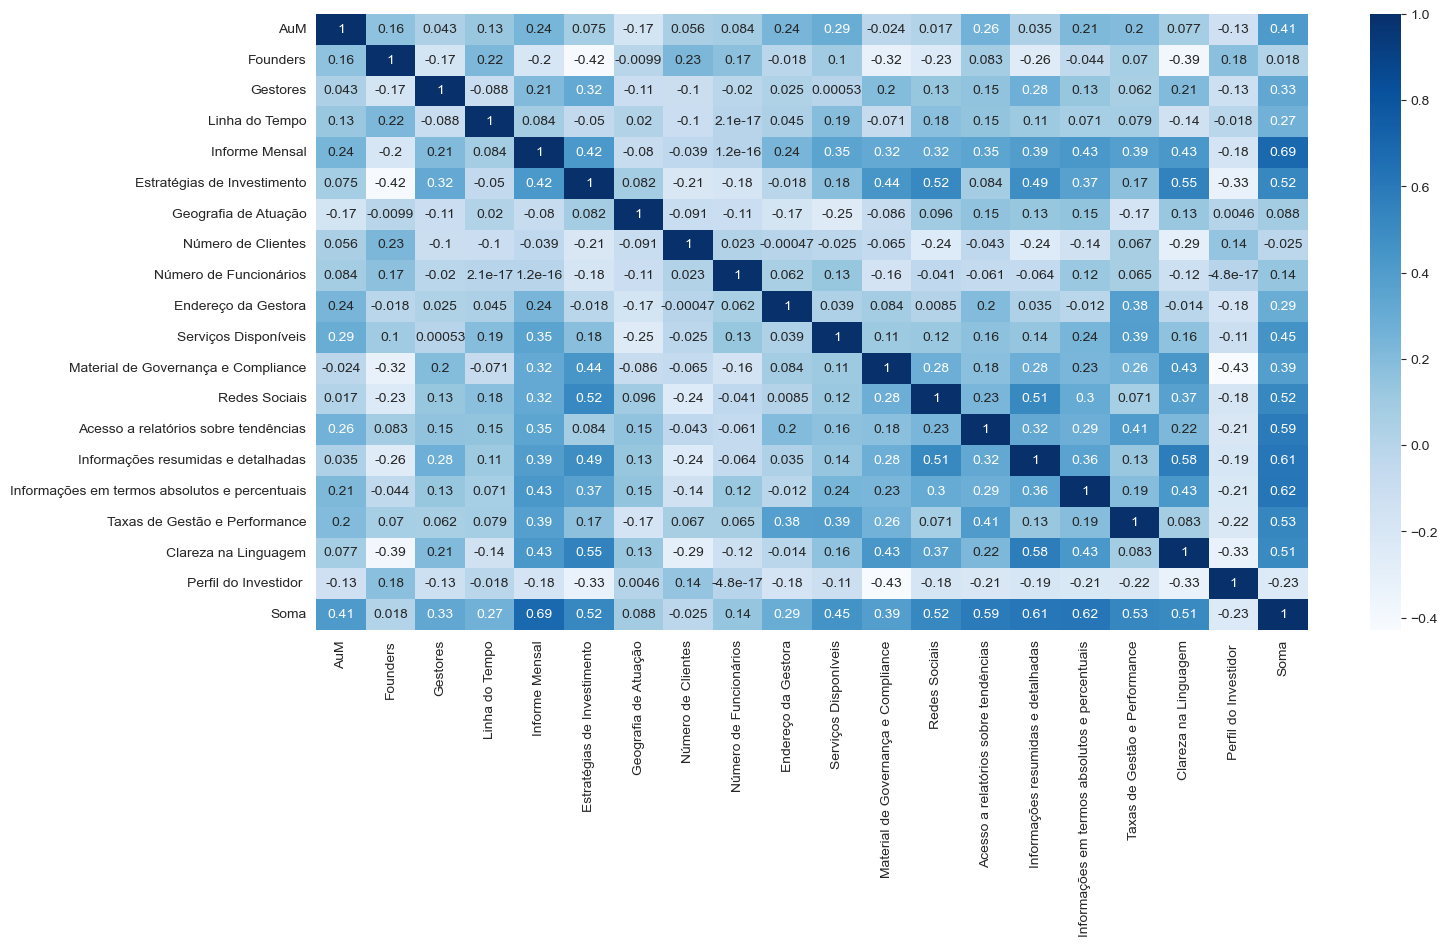

In [14]:
plt.figure(figsize = (16, 8) )
sns.heatmap(dfAvaliacaoSites.corr(), annot = True, cmap = 'Blues')

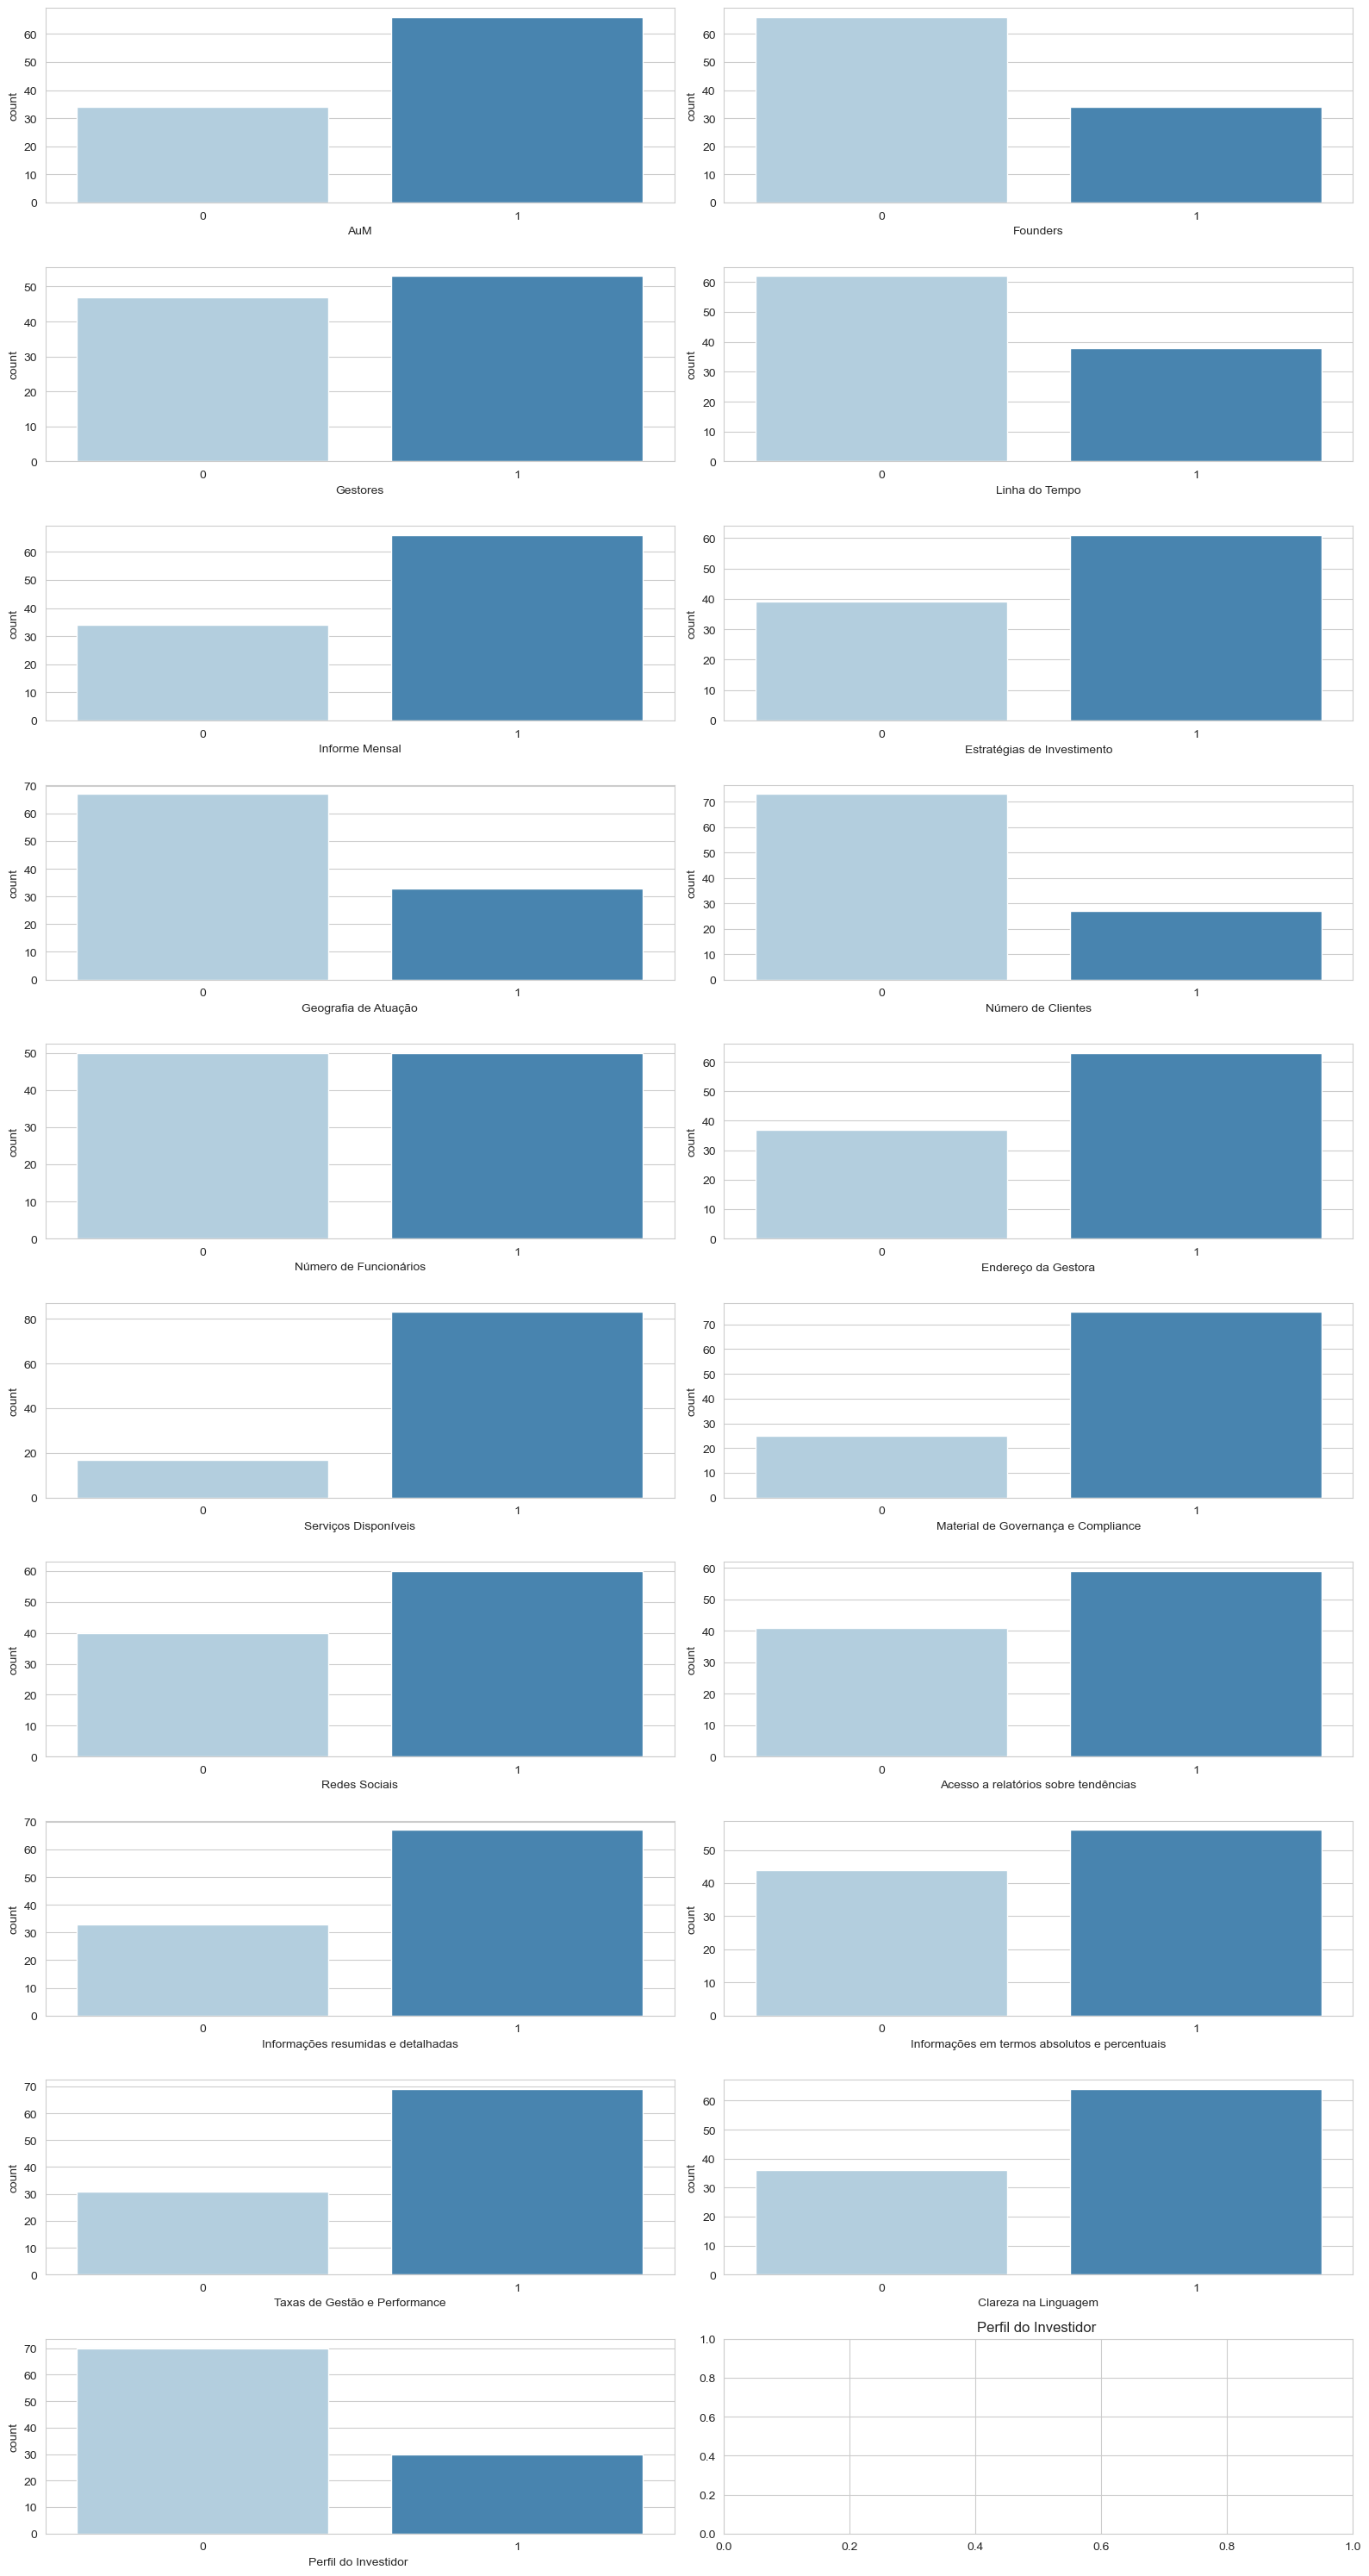

In [15]:
fig, axes = plt.subplots(10, 2, figsize =  (16,30))
for i, c in enumerate(dfAvaliacaoSites.columns[1:-1]):
    row = i//2
    col = i % 2
    ax = axes[row, col]
    plt.title(c)
    sns.countplot(x = dfAvaliacaoSites[c], palette = 'Blues', ax = ax)
    plt.tight_layout()

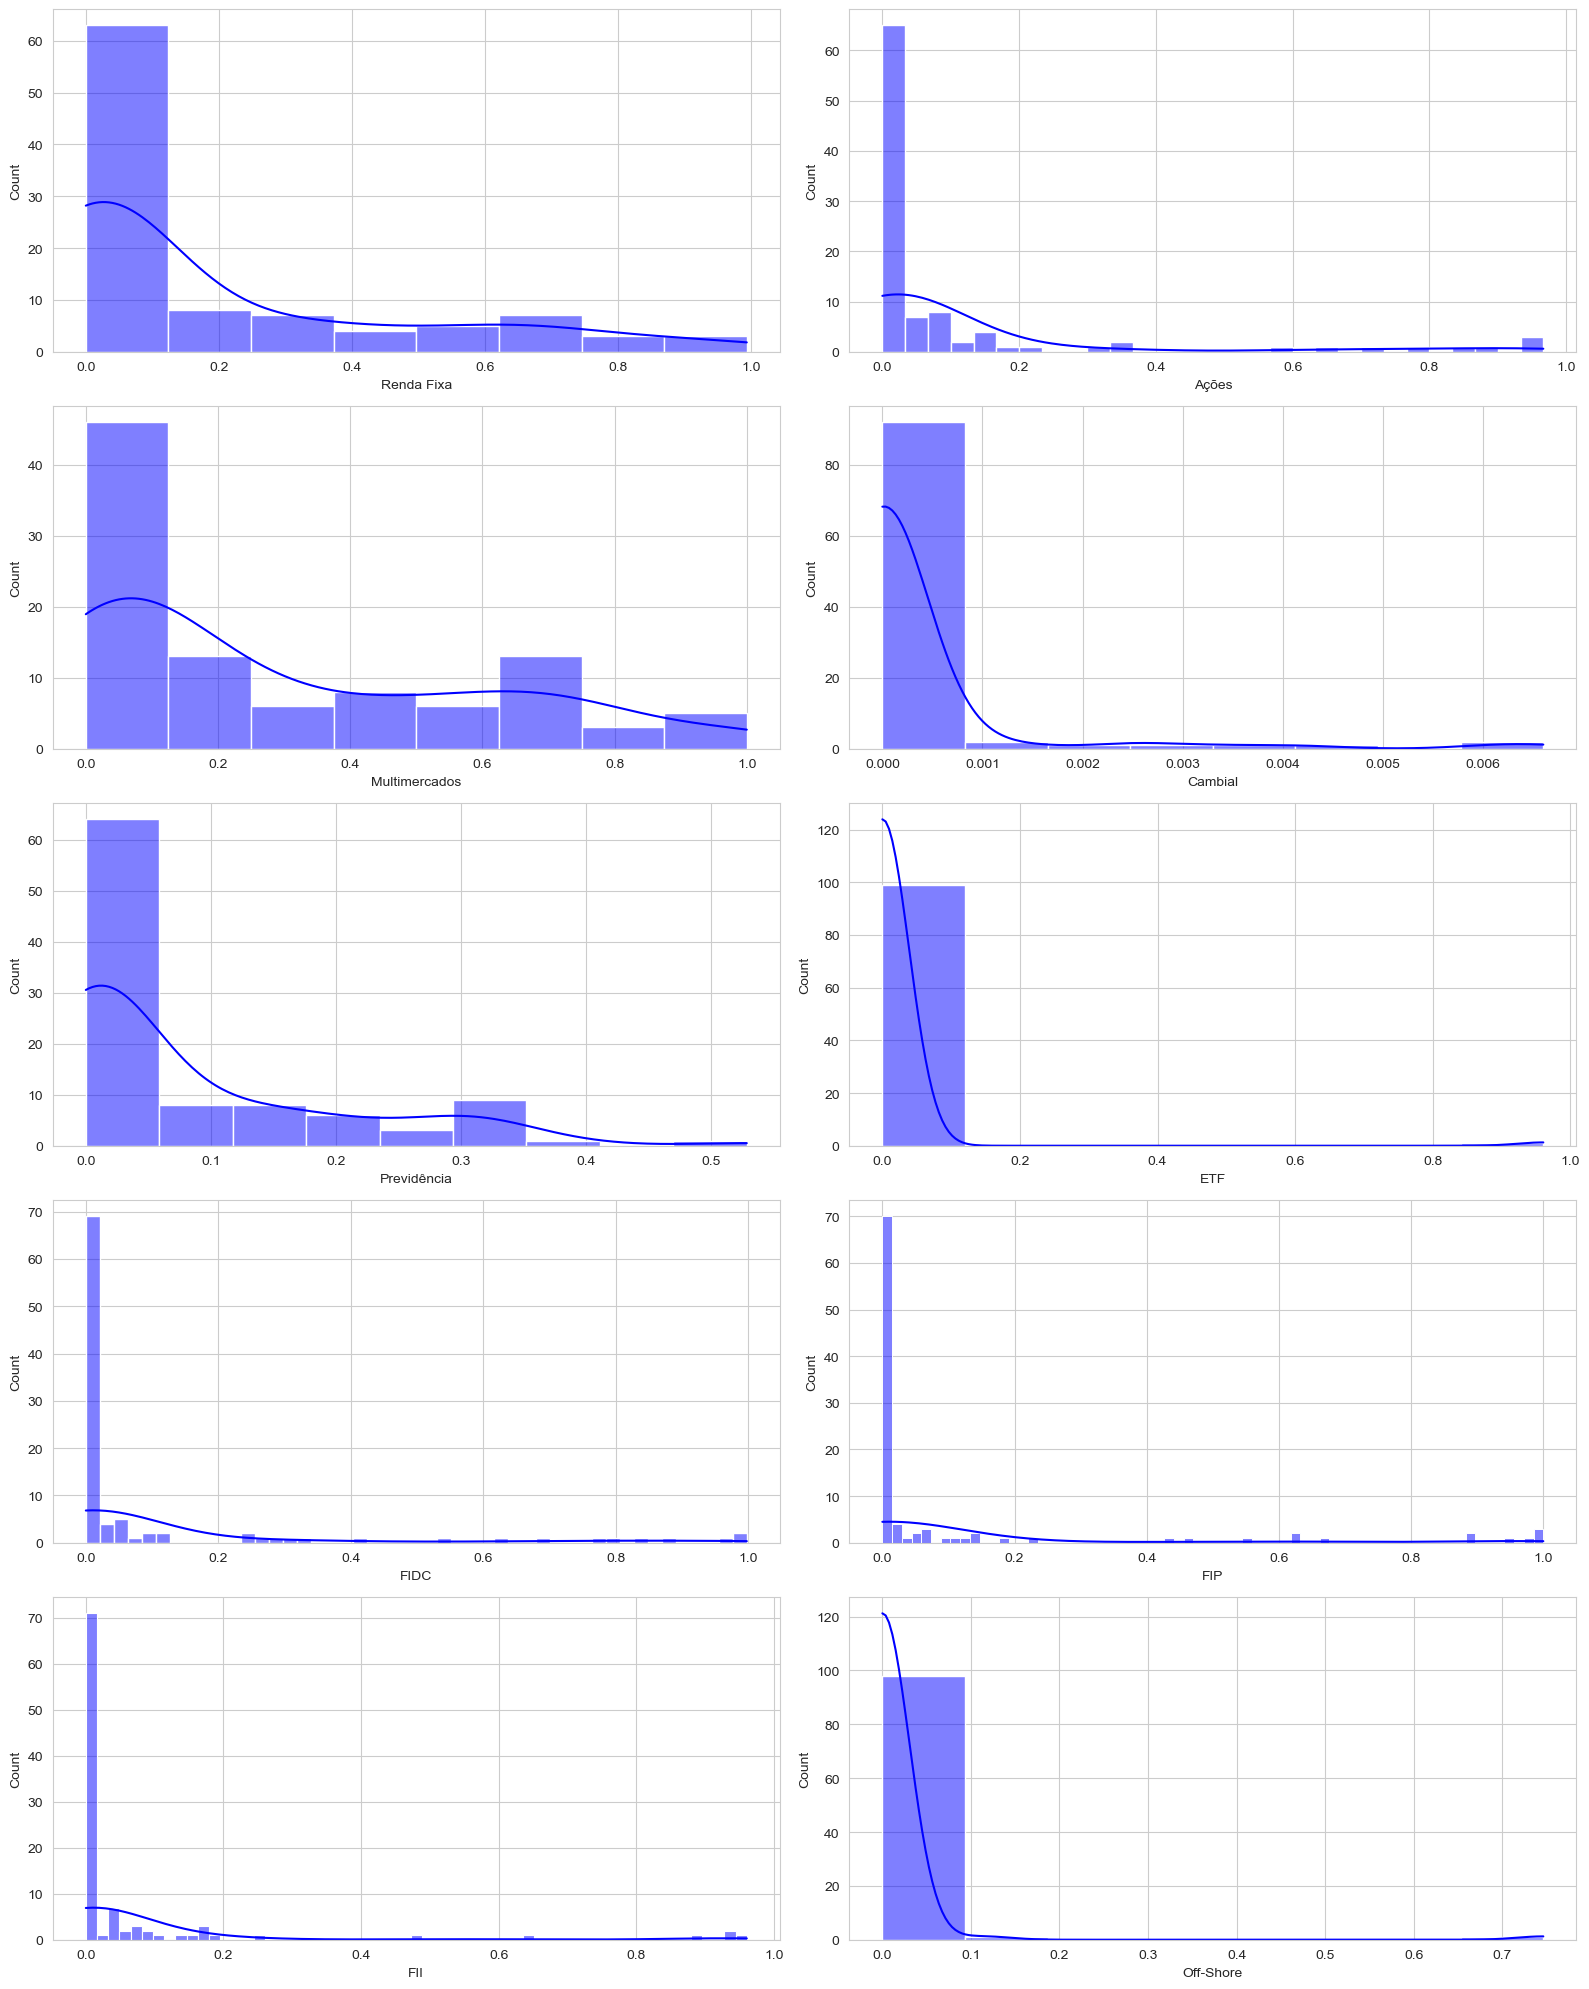

In [16]:
fig, axes = plt.subplots(5, 2, figsize =  (16,20))
for i, c in enumerate(df.columns[2:-1]):
    row = i//2
    col = i % 2
    ax = axes[row, col]
    sns.histplot(data = df[c], kde = True, color = 'b', ax = ax)
    plt.tight_layout()

In [17]:
dfTesteAuM

,Ordem,Gestor,Renda Fixa,Ações,Multimercados,Cambial,Previdência,ETF,FIDC,FIP,FII,Off-Shore,Total\n,AuM
0,1,BB ASSET MANAGEMENT,0.713453,0.013514,0.022506,0.000552,0.231658,0.001224,0.015462,0.000000,0.000457,0.001172,1.588997e+06,1
1,2,ITAU UNIBANCO ASSET MANAGEMENT LTDA,0.526454,0.044684,0.172691,0.002417,0.230226,0.015084,0.005741,0.000424,0.002278,0.000000,9.207003e+05,1
2,3,BRADESCO,0.506914,0.018089,0.068808,0.000598,0.384046,0.004759,0.016064,0.000118,0.000603,0.000000,6.890103e+05,1
3,4,CAIXA ASSET,0.650361,0.023798,0.021678,0.000134,0.302669,0.000144,0.000437,0.000000,0.000779,0.000000,5.224957e+05,0
4,5,BTG PACTUAL,0.272000,0.159373,0.201968,0.000575,0.040781,0.001315,0.082859,0.146482,0.076694,0.017954,3.923885e+05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,SOLIS INVESTIMENTOS,0.171277,0.000821,0.043783,0.000000,0.087652,0.000000,0.696467,0.000000,0.000000,0.000000,7.417859e+03,1
96,97,BANESTES DTVM,0.841506,0.000000,0.083427,0.000000,0.000000,0.000000,0.000000,0.000000,0.075067,0.000000,7.387664e+03,1
97,98,REDITUS INVESTIMENTOS LTDA,0.000000,0.000000,0.002016,0.000000,0.000000,0.000000,0.997984,0.000000,0.000000,0.000000,7.349776e+03,1
98,99,RBR ASSET MANAGEMENT,0.022833,0.001383,0.015455,0.000000,0.000000,0.000000,0.000000,0.000000,0.960329,0.000000,7.267236e+03,0


In [18]:
X = dfTesteAuM[dfTesteAuM.columns[2:-2]]
y = dfTesteAuM['AuM']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [20]:
y_train.shape, y_test.shape

((80,), (20,))

In [21]:
X_train

,Renda Fixa,Ações,Multimercados,Cambial,Previdência,ETF,FIDC,FIP,FII,Off-Shore
55,0.000000,0.000000,0.018606,0.0,0.000000,0.0,0.975978,0.000000,0.005416,0.0
88,0.038457,0.000000,0.052158,0.0,0.149180,0.0,0.057231,0.067584,0.635390,0.0
26,0.009695,0.088504,0.581517,0.0,0.320284,0.0,0.000000,0.000000,0.000000,0.0
42,0.005268,0.081309,0.609476,0.0,0.297396,0.0,0.006552,0.000000,0.000000,0.0
69,0.000000,0.946423,0.047962,0.0,0.000000,0.0,0.000000,0.005615,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
60,0.993420,0.006269,0.000311,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
71,0.674532,0.000000,0.017289,0.0,0.303654,0.0,0.000002,0.000000,0.004524,0.0
14,0.034826,0.006671,0.077168,0.0,0.000000,0.0,0.793383,0.029831,0.058120,0.0
92,0.125134,0.093900,0.630856,0.0,0.014432,0.0,0.040727,0.002729,0.092222,0.0


In [22]:
y_train

55    0
88    1
26    1
42    1
69    1
     ..
60    0
71    1
14    1
92    0
51    1
Name: AuM, Length: 80, dtype: int64

In [23]:
mod_logr = LogisticRegression(max_iter=10000)

In [24]:
mod_logr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [25]:
mod_logr.score(X_train, y_train)

0.6875

In [26]:
mod_logr.score(X_test, y_test)

0.55

In [27]:
def relacao_pl(df_pl, df_avaliacao):
    lista = []
    for i, c in enumerate(df_avaliacao.columns[1:-1]):
        dfTeste = df_pl.copy()
        dfTeste[c] = df_avaliacao[c]
        X = dfTeste[dfTeste.columns[2:-2]]
        y = dfTeste[c]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
        y_train.shape, y_test.shape
        mod_logr = LogisticRegression(max_iter=10000)
        mod_logr.fit(X_train, y_train)
        mod_logr.score(X_train, y_train)
        score = mod_logr.score(X_test, y_test)
        result = {c: score}
        lista.append(result)
    return lista

In [28]:
relacao_pl(df, dfAvaliacaoSites)

[{'AuM': 0.55},
 {'Founders': 0.9},
 {'Gestores': 0.65},
 {'Linha do Tempo': 0.7},
 {'Informe Mensal': 0.45},
 {'Estratégias de Investimento': 0.5},
 {'Geografia de Atuação': 0.55},
 {'Número de Clientes': 0.75},
 {'Número de Funcionários': 0.6},
 {'Endereço da Gestora': 0.65},
 {'Serviços Disponíveis': 0.8},
 {'Material de Governança e Compliance': 0.8},
 {'Redes Sociais': 0.4},
 {'Acesso a relatórios sobre tendências': 0.45},
 {'Informações resumidas e detalhadas': 0.65},
 {'Informações em termos absolutos e percentuais': 0.45},
 {'Taxas de Gestão e Performance': 0.7},
 {'Clareza na Linguagem': 0.6},
 {'Perfil do Investidor ': 0.7}]

In [29]:
def relacao_pl_coef(df_pl, df_avaliacao, fig = (10,1)):
    lista = []
    coeficientes_por_modelo = []
    plt.figure(figsize=(8, 10))  # Criar a figura fora do loop
    for i, c in enumerate(df_avaliacao.columns[1:-1]):
        dfTeste = df_pl.copy()
        dfTeste[c] = df_avaliacao[c]
        X = dfTeste[dfTeste.columns[2:-2]]
        y = dfTeste[c]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
        y_train.shape, y_test.shape
        mod_logr = LogisticRegression(max_iter=10000)
        mod_logr.fit(X_train, y_train)
        mod_logr.score(X_train, y_train)
        score = mod_logr.score(X_test, y_test)
        result = {c: score}
        lista.append(result)
        
        corr_matrix = pd.concat([X,y], axis = 1).corr()

        # Filtrar para manter apenas a última coluna
        last_col = corr_matrix.iloc[:, -1].to_frame()  # Convertendo a série para DataFrame
        last_col_corr = last_col.T  # Transpor para ter a última coluna como linha

        # Plotar o heatmap
        plt.figure(figsize= fig)
        sns.heatmap(last_col_corr, annot=True, cmap='Blues', cbar=True)
        plt.show()
        
        # Chamar a função coeficientes e adicionar o resultado à lista
        coeficientes_por_modelo.append(coeficientes(X_train, y_train, X_test, y_test, c))
        
    return lista, coeficientes_por_modelo

In [30]:
def coeficientes(X_train, y_train, X_test, y_test, c):
    mod_logr = LogisticRegression(max_iter=10000)
    mod_logr.fit(X_train, y_train)
    score = mod_logr.score(X_test, y_test)
    plt.figure(figsize = (10, 16))
    importances = mod_logr.coef_

    df_coeficientes = pd.DataFrame(columns = ['Feature', 'Coeficiente'])
    feature = []
    coeficientes = []
    for i, coef in enumerate(importances[0]):
        feature.append(X_train.columns[i])
        coeficientes.append(coef)
    df_coeficientes['Feature'] = feature
    df_coeficientes['Coeficiente'] = coeficientes
    print('\n', '-'*10, c, '-'*10)
    print(f'          Score:{score}\n')
    print(df_coeficientes)
    
    return df_coeficientes

<Figure size 800x1000 with 0 Axes>

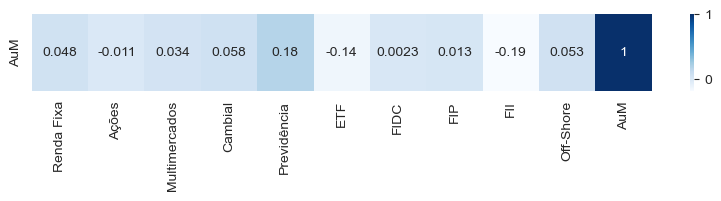


 ---------- AuM ----------
          Score:0.55

         Feature  Coeficiente
0     Renda Fixa    -0.078881
1          Ações    -0.134918
2  Multimercados     0.614285
3        Cambial     0.005921
4    Previdência     0.386142
5            ETF    -0.507871
6           FIDC     0.052153
7            FIP    -0.130820
8            FII    -0.362055
9      Off-Shore     0.156180


<Figure size 1000x1600 with 0 Axes>

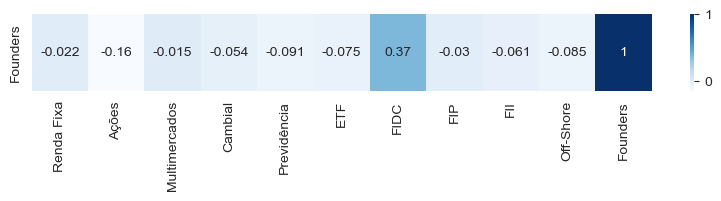


 ---------- Founders ----------
          Score:0.9

         Feature  Coeficiente
0     Renda Fixa     0.120841
1          Ações    -0.772158
2  Multimercados     0.047435
3        Cambial    -0.000834
4    Previdência    -0.256254
5            ETF    -0.287644
6           FIDC     1.383300
7            FIP    -0.062809
8            FII     0.085416
9      Off-Shore    -0.257349


<Figure size 1000x1600 with 0 Axes>

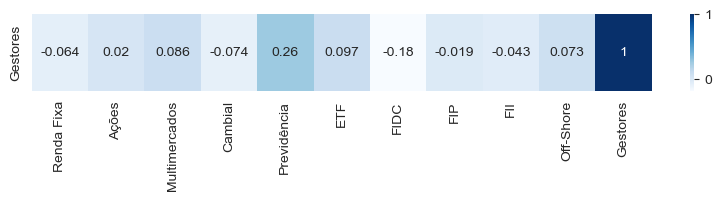


 ---------- Gestores ----------
          Score:0.65

         Feature  Coeficiente
0     Renda Fixa    -0.460995
1          Ações    -0.133267
2  Multimercados     0.198615
3        Cambial     0.000121
4    Previdência     1.019826
5            ETF     0.377185
6           FIDC    -0.623433
7            FIP    -0.415994
8            FII    -0.200444
9      Off-Shore     0.238400


<Figure size 1000x1600 with 0 Axes>

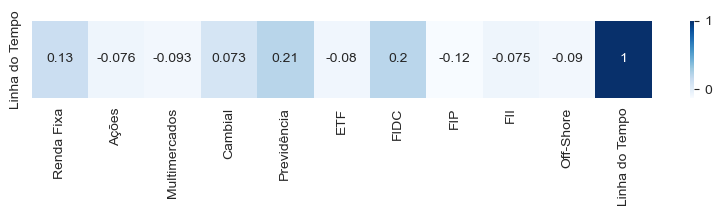


 ---------- Linha do Tempo ----------
          Score:0.7

         Feature  Coeficiente
0     Renda Fixa     0.392156
1          Ações    -0.356455
2  Multimercados    -0.298601
3        Cambial     0.004123
4    Previdência     0.720244
5            ETF    -0.340225
6           FIDC     0.851030
7            FIP    -0.606481
8            FII    -0.048636
9      Off-Shore    -0.317042


<Figure size 1000x1600 with 0 Axes>

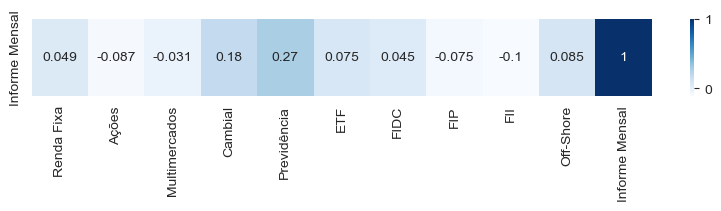


 ---------- Informe Mensal ----------
          Score:0.45

         Feature  Coeficiente
0     Renda Fixa    -0.223968
1          Ações    -0.175392
2  Multimercados     0.353618
3        Cambial     0.006441
4    Previdência     0.879823
5            ETF     0.282105
6           FIDC     0.288720
7            FIP    -1.145176
8            FII    -0.521786
9      Off-Shore     0.255680


<Figure size 1000x1600 with 0 Axes>

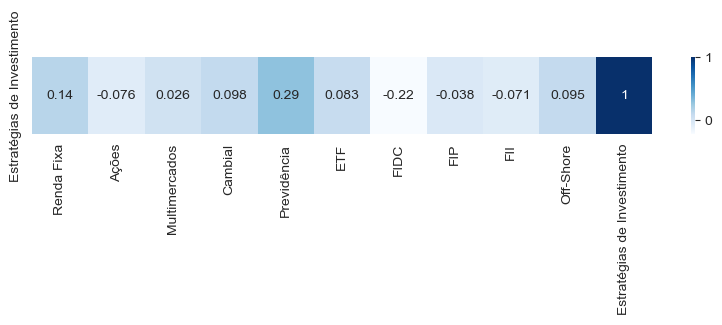


 ---------- Estratégias de Investimento ----------
          Score:0.5

         Feature  Coeficiente
0     Renda Fixa     0.108616
1          Ações    -0.068387
2  Multimercados     0.442985
3        Cambial     0.001204
4    Previdência     0.768710
5            ETF     0.312754
6           FIDC    -0.848543
7            FIP    -0.523491
8            FII    -0.474276
9      Off-Shore     0.280583


<Figure size 1000x1600 with 0 Axes>

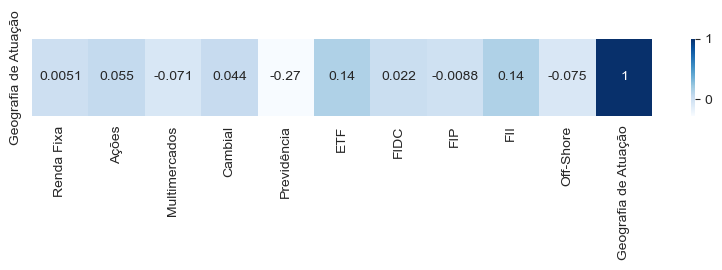


 ---------- Geografia de Atuação ----------
          Score:0.55

         Feature  Coeficiente
0     Renda Fixa     0.346439
1          Ações     0.616227
2  Multimercados    -0.214834
3        Cambial     0.004086
4    Previdência    -0.956034
5            ETF     0.544668
6           FIDC     0.227319
7            FIP    -0.541843
8            FII     0.197391
9      Off-Shore    -0.223648


<Figure size 1000x1600 with 0 Axes>

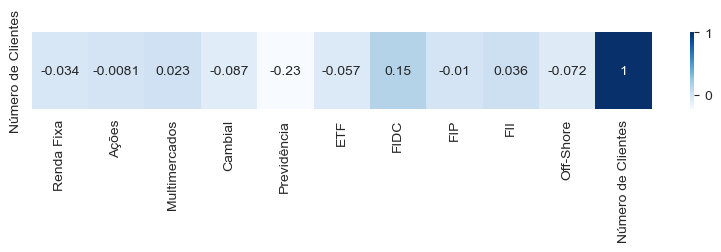


 ---------- Número de Clientes ----------
          Score:0.75

         Feature  Coeficiente
0     Renda Fixa     0.261512
1          Ações     0.124386
2  Multimercados     0.252300
3        Cambial    -0.002271
4    Previdência    -0.737482
5            ETF    -0.190430
6           FIDC     0.408017
7            FIP     0.026989
8            FII     0.053785
9      Off-Shore    -0.196855


<Figure size 1000x1600 with 0 Axes>

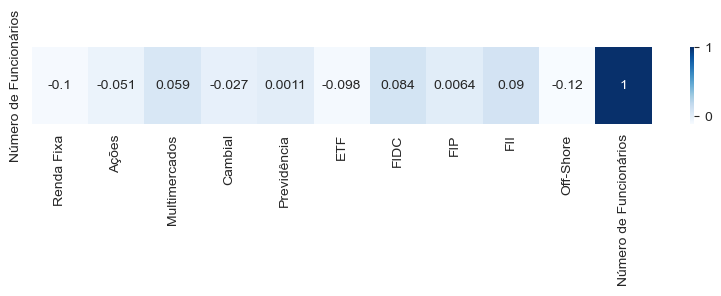


 ---------- Número de Funcionários ----------
          Score:0.6

         Feature  Coeficiente
0     Renda Fixa    -0.138051
1          Ações    -0.309276
2  Multimercados     0.422000
3        Cambial     0.002560
4    Previdência     0.089242
5            ETF    -0.366505
6           FIDC     0.125131
7            FIP    -0.012311
8            FII     0.558083
9      Off-Shore    -0.370726


<Figure size 1000x1600 with 0 Axes>

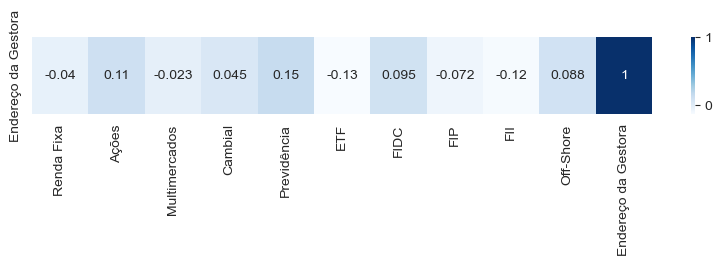


 ---------- Endereço da Gestora ----------
          Score:0.65

         Feature  Coeficiente
0     Renda Fixa    -0.384801
1          Ações     0.543067
2  Multimercados    -0.283224
3        Cambial     0.000353
4    Previdência     0.638674
5            ETF    -0.492239
6           FIDC     0.221609
7            FIP     0.157563
8            FII    -0.658925
9      Off-Shore     0.257923


<Figure size 1000x1600 with 0 Axes>

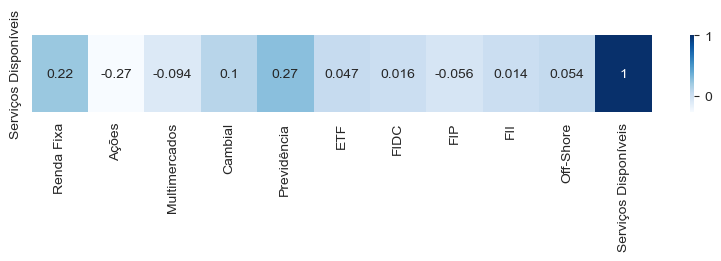


 ---------- Serviços Disponíveis ----------
          Score:0.8

         Feature  Coeficiente
0     Renda Fixa     0.679841
1          Ações    -1.115432
2  Multimercados    -0.009578
3        Cambial     0.001934
4    Previdência     0.676531
5            ETF     0.139364
6           FIDC    -0.152718
7            FIP    -0.774471
8            FII     0.421660
9      Off-Shore     0.132873


<Figure size 1000x1600 with 0 Axes>

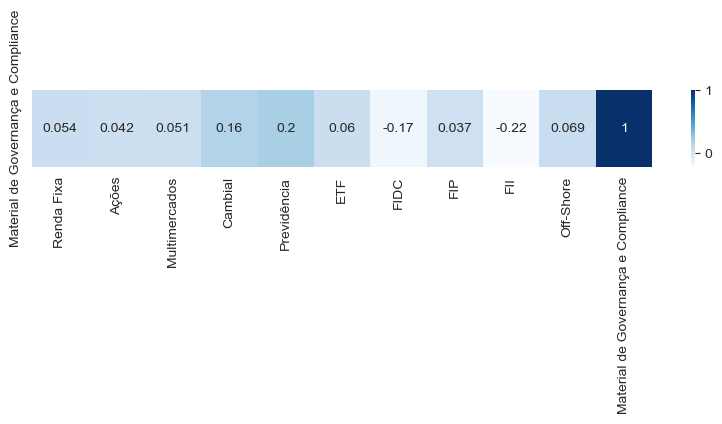


 ---------- Material de Governança e Compliance ----------
          Score:0.8

         Feature  Coeficiente
0     Renda Fixa    -0.018366
1          Ações     0.518549
2  Multimercados    -0.052385
3        Cambial     0.005558
4    Previdência     0.657905
5            ETF     0.214693
6           FIDC    -0.602334
7            FIP     0.057825
8            FII    -0.968446
9      Off-Shore     0.187036


<Figure size 1000x1600 with 0 Axes>

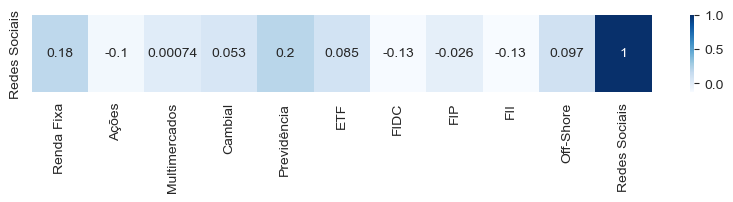


 ---------- Redes Sociais ----------
          Score:0.4

         Feature  Coeficiente
0     Renda Fixa     0.403452
1          Ações    -0.498382
2  Multimercados     0.344074
3        Cambial    -0.001549
4    Previdência     0.534756
5            ETF     0.323327
6           FIDC    -0.619168
7            FIP    -0.678140
8            FII    -0.107952
9      Off-Shore     0.299638


<Figure size 1000x1600 with 0 Axes>

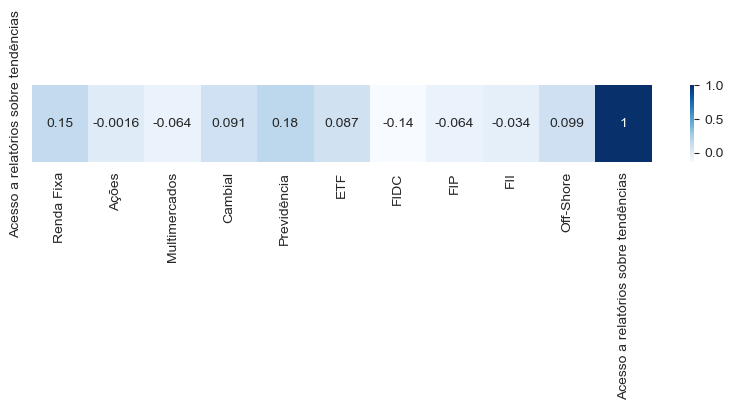


 ---------- Acesso a relatórios sobre tendências ----------
          Score:0.45

         Feature  Coeficiente
0     Renda Fixa     0.699920
1          Ações     0.036249
2  Multimercados     0.019296
3        Cambial     0.007121
4    Previdência     0.508522
5            ETF     0.359816
6           FIDC    -0.381973
7            FIP    -0.961035
8            FII    -0.614737
9      Off-Shore     0.326836


<Figure size 1000x1600 with 0 Axes>

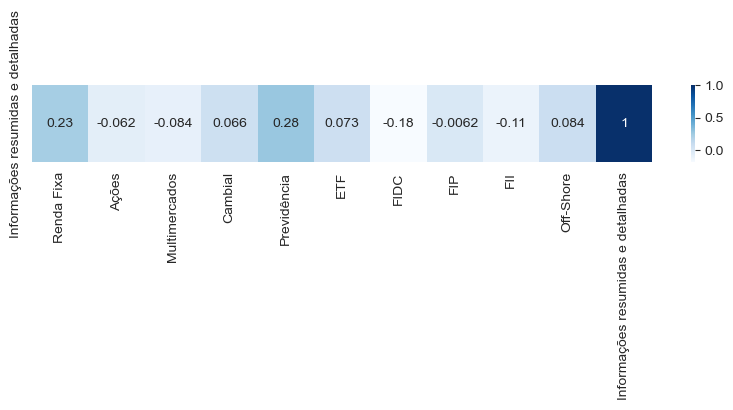


 ---------- Informações resumidas e detalhadas ----------
          Score:0.65

         Feature  Coeficiente
0     Renda Fixa     0.662925
1          Ações    -0.357444
2  Multimercados    -0.095256
3        Cambial    -0.000424
4    Previdência     0.723762
5            ETF     0.272222
6           FIDC    -0.782624
7            FIP    -0.679802
8            FII     0.007836
9      Off-Shore     0.248842


<Figure size 1000x1600 with 0 Axes>

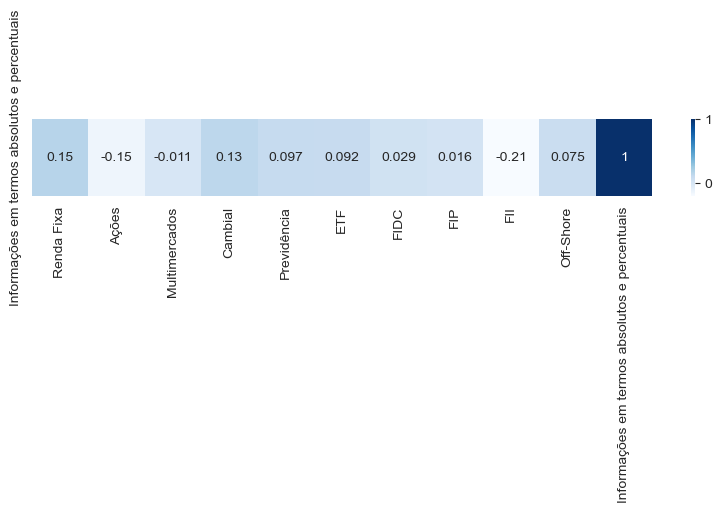


 ---------- Informações em termos absolutos e percentuais ----------
          Score:0.45

         Feature  Coeficiente
0     Renda Fixa     0.598784
1          Ações    -0.444044
2  Multimercados     0.457973
3        Cambial     0.008888
4    Previdência     0.101805
5            ETF     0.402334
6           FIDC     0.322024
7            FIP    -0.571418
8            FII    -1.152741
9      Off-Shore     0.276503


<Figure size 1000x1600 with 0 Axes>

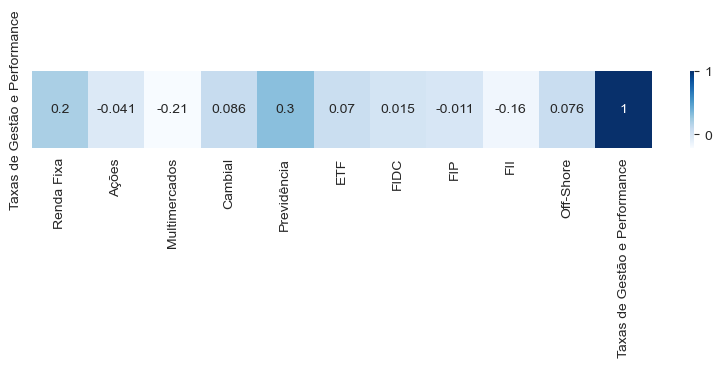


 ---------- Taxas de Gestão e Performance ----------
          Score:0.7

         Feature  Coeficiente
0     Renda Fixa     0.471730
1          Ações     0.131510
2  Multimercados    -0.756499
3        Cambial     0.000709
4    Previdência     1.039434
5            ETF     0.238316
6           FIDC    -0.179061
7            FIP    -0.261333
8            FII    -0.885726
9      Off-Shore     0.201005


<Figure size 1000x1600 with 0 Axes>

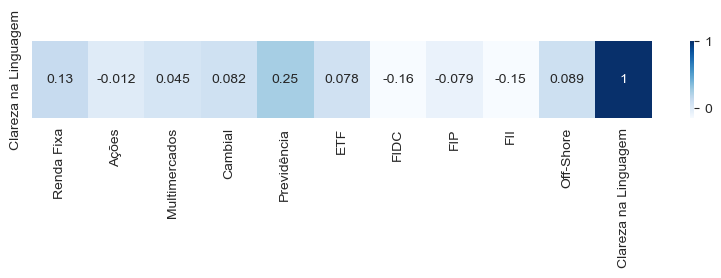


 ---------- Clareza na Linguagem ----------
          Score:0.6

         Feature  Coeficiente
0     Renda Fixa     0.332268
1          Ações    -0.150180
2  Multimercados     0.504028
3        Cambial     0.001086
4    Previdência     0.748350
5            ETF     0.331311
6           FIDC    -0.547319
7            FIP    -0.748231
8            FII    -0.768680
9      Off-Shore     0.297392


<Figure size 1000x1600 with 0 Axes>

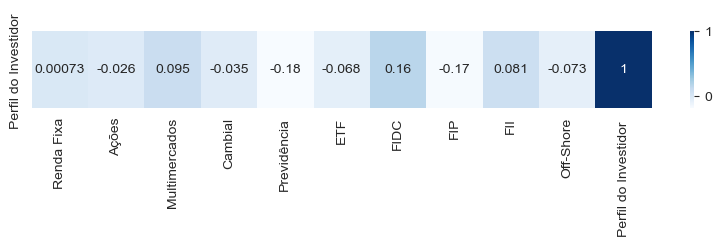


 ---------- Perfil do Investidor  ----------
          Score:0.7

         Feature  Coeficiente
0     Renda Fixa     0.401562
1          Ações    -0.332926
2  Multimercados     0.580298
3        Cambial    -0.000278
4    Previdência    -0.598064
5            ETF    -0.217006
6           FIDC     0.736801
7            FIP    -0.747736
8            FII     0.375663
9      Off-Shore    -0.198572


<Figure size 1000x1600 with 0 Axes>

In [31]:
# Chamada da função relacao_pl_coef
lista_resultados, coeficientes_por_modelo = relacao_pl_coef(df, dfAvaliacaoSites)

In [32]:
df2 = pd.read_excel('TCCtena.xlsx', sheet_name= 'Anbimadata',
                  skiprows=2, usecols='X:AN')

In [33]:
df2.fillna(0, inplace= True)

In [34]:
df2.head()

,EFPC\nEmp.Públicas,EFPC Emp. Privadas,RPPS,EAPC,Seguradora,Capitalização,Corporate,Middle Market,Private,Varejo Alta Renda,Varejo Tradicional,Conta e Ordem,Poder Público,Investidores Não Residentes,Fundos de Investimento²,Outros³,Total.1
0,169121.274114,14596.129403,92163.485913,369183.394541,9505.970647,4257.247630,100904.117448,30184.340372,52498.387531,115711.007204,92853.491970,43.680985,536233.256940,545.556769,1195.662546,0.000000,1.588997e+06
1,4589.600054,80042.143214,39.357710,223617.272487,7808.187394,2545.559113,172411.208959,78922.418140,145041.334149,135166.341238,26379.544328,756.164978,28941.492773,463.350168,13976.341051,0.000000,9.207003e+05
2,7891.596186,56183.969066,13554.150271,291189.505903,19464.927502,3953.042356,109977.705427,26739.582034,24570.646916,55265.800174,41480.374102,578.053395,5757.616246,1945.745014,29513.748740,943.882545,6.890103e+05
3,1129.398877,10.670908,75050.561393,161554.595404,1406.769382,1497.954735,39340.330888,23009.104987,11197.956103,44446.036251,55924.822785,0.000000,107927.453866,0.000000,0.000000,0.000000,5.224957e+05
4,1900.875551,3716.986575,4421.384188,14538.588081,6998.282395,0.244919,50650.560099,0.023148,130166.652217,3267.448655,483.628361,55478.980610,0.000000,33022.041514,37183.186508,50559.657726,3.923885e+05


In [36]:
for coluna in df2.columns[:-1]:
    df2[coluna] = (df2[coluna].astype(float)/df2['Total.1'])

In [69]:
def relacao_outros(df_pl, df_avaliacao):
    lista = []
    for i, c in enumerate(df_avaliacao.columns[1:-1]):
        dfTeste = df_pl.copy()
        dfTeste[c] = df_avaliacao[c]
        X = dfTeste[dfTeste.columns[:-2]]
        y = dfTeste[c]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
        y_train.shape, y_test.shape
        mod_logr = LogisticRegression(max_iter=10000)
        mod_logr.fit(X_train, y_train)
        mod_logr.score(X_train, y_train)
        score = mod_logr.score(X_test, y_test)
        result = {c: score}
        lista.append(result)
    return lista

In [38]:
relacao_outros(df2, dfAvaliacaoSites)

[{'AuM': 0.55},
 {'Founders': 0.75},
 {'Gestores': 0.5},
 {'Linha do Tempo': 0.65},
 {'Informe Mensal': 0.6},
 {'Estratégias de Investimento': 0.55},
 {'Geografia de Atuação': 0.55},
 {'Número de Clientes': 0.8},
 {'Número de Funcionários': 0.7},
 {'Endereço da Gestora': 0.7},
 {'Serviços Disponíveis': 0.8},
 {'Material de Governança e Compliance': 0.8},
 {'Redes Sociais': 0.55},
 {'Acesso a relatórios sobre tendências': 0.5},
 {'Informações resumidas e detalhadas': 0.75},
 {'Informações em termos absolutos e percentuais': 0.5},
 {'Taxas de Gestão e Performance': 0.75},
 {'Clareza na Linguagem': 0.65},
 {'Perfil do Investidor ': 0.7}]

In [39]:
def relacao_outros_coef (df_pl, df_avaliacao, fig = (10,1)):
    lista = []
    coeficientes_por_modelo = []
    plt.figure(figsize=(8, 10))  # Criar a figura fora do loop
    for i, c in enumerate(df_avaliacao.columns[1:-1]):
        dfTeste = df_pl.copy()
        dfTeste[c] = df_avaliacao[c]
        X = dfTeste[dfTeste.columns[:-2]]
        y = dfTeste[c]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
        y_train.shape, y_test.shape
        mod_logr = LogisticRegression(max_iter=10000)
        mod_logr.fit(X_train, y_train)
        mod_logr.score(X_train, y_train)
        score = mod_logr.score(X_test, y_test)
        result = {c: score}
        lista.append(result)
        
        corr_matrix = pd.concat([X,y], axis = 1).corr()

        # Filtrar para manter apenas a última coluna
        last_col = corr_matrix.iloc[:, -1].to_frame()  # Convertendo a série para DataFrame
        last_col_corr = last_col.T  # Transpor para ter a última coluna como linha

        # Plotar o heatmap
        plt.figure(figsize= fig)
        sns.heatmap(last_col_corr, annot=True, cmap='Blues', cbar=True)
        plt.show()
        
        # Chamar a função coeficientes e adicionar o resultado à lista
        coeficientes_por_modelo.append(coeficientes(X_train, y_train, X_test, y_test, c))
        
    return lista, coeficientes_por_modelo

<Figure size 800x1000 with 0 Axes>

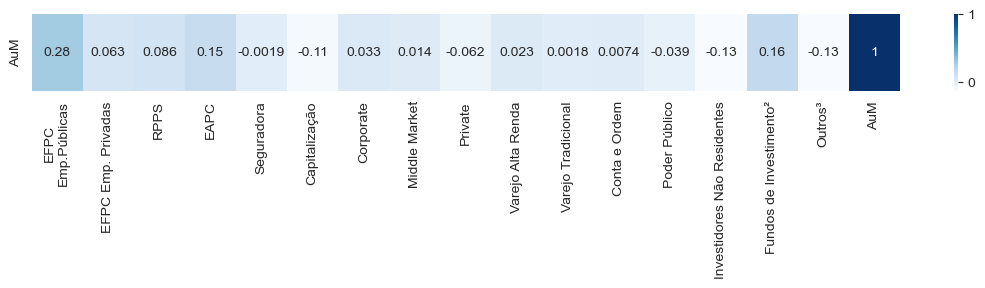


 ---------- AuM ----------
          Score:0.55

                        Feature  Coeficiente
0            EFPC\nEmp.Públicas     0.208729
1            EFPC Emp. Privadas     0.215816
2                          RPPS     0.167513
3                          EAPC     0.258656
4                    Seguradora    -0.315506
5                 Capitalização    -0.065331
6                     Corporate     0.058045
7                 Middle Market    -0.082187
8                       Private     0.511046
9             Varejo Alta Renda    -0.131889
10           Varejo Tradicional    -0.031040
11                Conta e Ordem    -0.245755
12                Poder Público    -0.255966
13  Investidores Não Residentes    -0.594167
14      Fundos de Investimento²     0.804956
15                      Outros³    -0.502528


<Figure size 1000x1600 with 0 Axes>

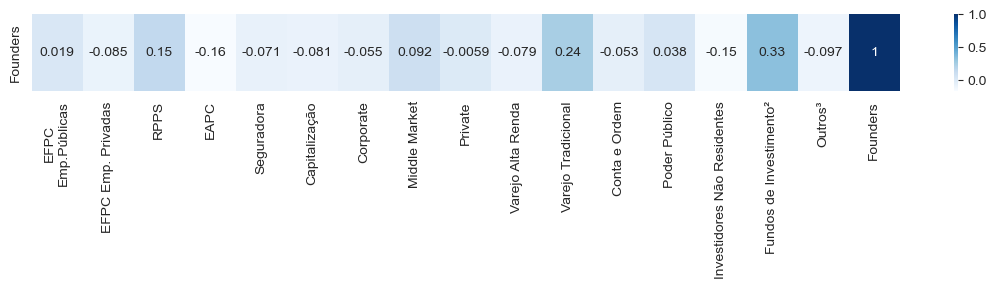


 ---------- Founders ----------
          Score:0.75

                        Feature  Coeficiente
0            EFPC\nEmp.Públicas     0.059952
1            EFPC Emp. Privadas    -0.291385
2                          RPPS     0.325041
3                          EAPC    -0.462857
4                    Seguradora    -0.045500
5                 Capitalização    -0.015919
6                     Corporate    -0.222429
7                 Middle Market     0.063286
8                       Private    -0.239762
9             Varejo Alta Renda    -0.290978
10           Varejo Tradicional     0.619126
11                Conta e Ordem    -0.340661
12                Poder Público     0.243630
13  Investidores Não Residentes    -0.417670
14      Fundos de Investimento²     1.305040
15                      Outros³    -0.289023


<Figure size 1000x1600 with 0 Axes>

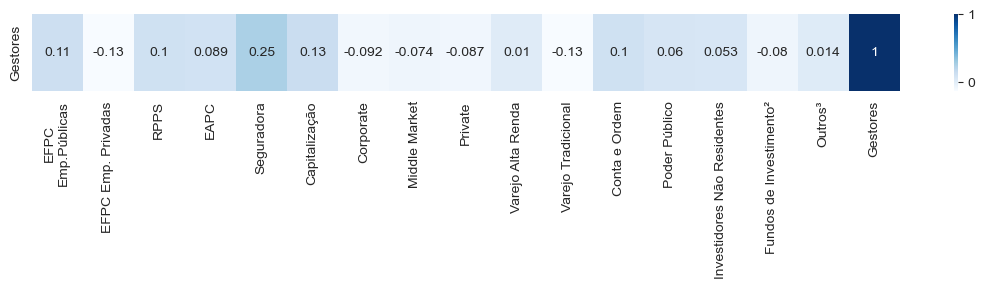


 ---------- Gestores ----------
          Score:0.5

                        Feature  Coeficiente
0            EFPC\nEmp.Públicas     0.065368
1            EFPC Emp. Privadas    -0.598256
2                          RPPS     0.227432
3                          EAPC     0.300213
4                    Seguradora     0.611895
5                 Capitalização     0.033591
6                     Corporate    -0.427831
7                 Middle Market     0.015001
8                       Private    -0.115071
9             Varejo Alta Renda     0.247976
10           Varejo Tradicional    -0.373888
11                Conta e Ordem     0.440550
12                Poder Público     0.129911
13  Investidores Não Residentes    -0.223048
14      Fundos de Investimento²    -0.243792
15                      Outros³    -0.089628


<Figure size 1000x1600 with 0 Axes>

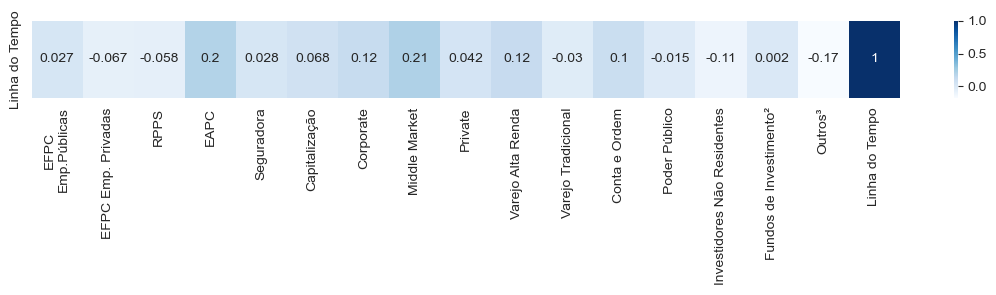


 ---------- Linha do Tempo ----------
          Score:0.65

                        Feature  Coeficiente
0            EFPC\nEmp.Públicas     0.060099
1            EFPC Emp. Privadas    -0.450957
2                          RPPS    -0.158066
3                          EAPC     0.456329
4                    Seguradora     0.214564
5                 Capitalização     0.038187
6                     Corporate     0.447645
7                 Middle Market     0.130447
8                       Private     0.510686
9             Varejo Alta Renda     0.080841
10           Varejo Tradicional    -0.163449
11                Conta e Ordem     0.320882
12                Poder Público    -0.071527
13  Investidores Não Residentes    -0.304926
14      Fundos de Investimento²    -0.187243
15                      Outros³    -0.923814


<Figure size 1000x1600 with 0 Axes>

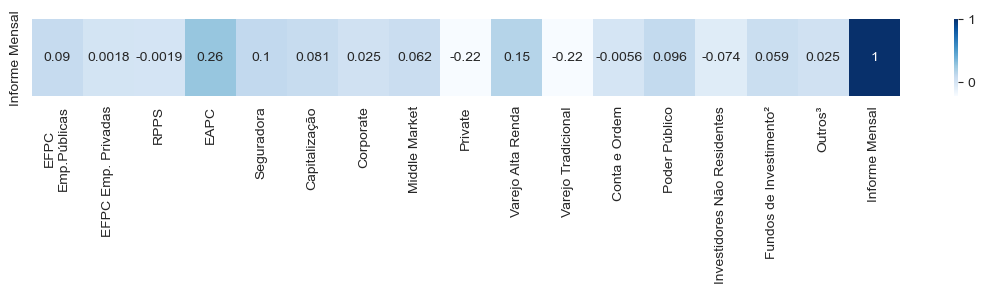


 ---------- Informe Mensal ----------
          Score:0.6

                        Feature  Coeficiente
0            EFPC\nEmp.Públicas     0.070157
1            EFPC Emp. Privadas    -0.085054
2                          RPPS    -0.040290
3                          EAPC     0.671448
4                    Seguradora     0.132874
5                 Capitalização     0.015676
6                     Corporate     0.010315
7                 Middle Market     0.006313
8                       Private    -0.595420
9             Varejo Alta Renda     0.424350
10           Varejo Tradicional    -0.649534
11                Conta e Ordem    -0.210897
12                Poder Público     0.291906
13  Investidores Não Residentes    -0.665924
14      Fundos de Investimento²     0.495341
15                      Outros³     0.128977


<Figure size 1000x1600 with 0 Axes>

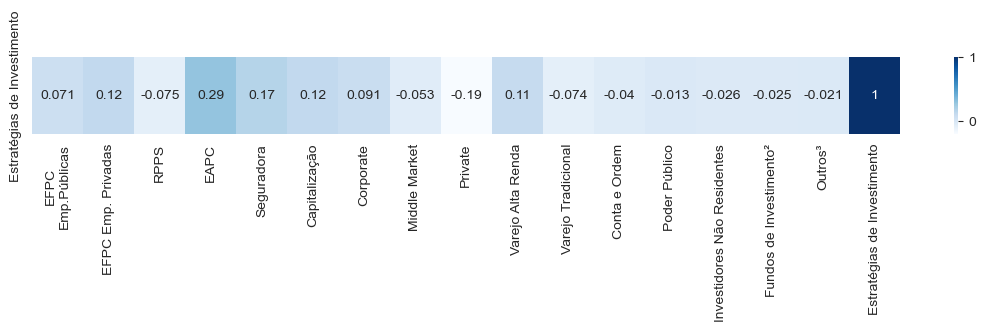


 ---------- Estratégias de Investimento ----------
          Score:0.55

                        Feature  Coeficiente
0            EFPC\nEmp.Públicas     0.032780
1            EFPC Emp. Privadas     0.353944
2                          RPPS    -0.221849
3                          EAPC     0.702410
4                    Seguradora     0.333351
5                 Capitalização     0.027305
6                     Corporate     0.377509
7                 Middle Market    -0.075108
8                       Private    -0.307300
9             Varejo Alta Renda     0.327587
10           Varejo Tradicional    -0.263025
11                Conta e Ordem    -0.431654
12                Poder Público    -0.220428
13  Investidores Não Residentes    -0.435954
14      Fundos de Investimento²    -0.032942
15                      Outros³    -0.166856


<Figure size 1000x1600 with 0 Axes>

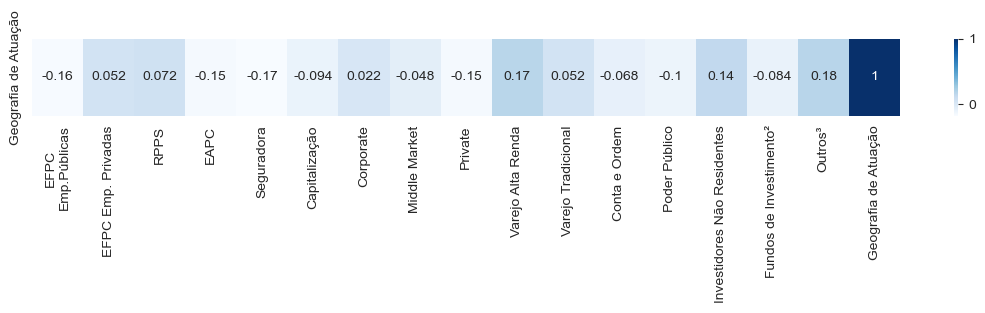


 ---------- Geografia de Atuação ----------
          Score:0.55

                        Feature  Coeficiente
0            EFPC\nEmp.Públicas    -0.098475
1            EFPC Emp. Privadas     0.400626
2                          RPPS     0.178524
3                          EAPC    -0.411172
4                    Seguradora    -0.331593
5                 Capitalização    -0.018499
6                     Corporate     0.056276
7                 Middle Market    -0.178378
8                       Private    -0.631380
9             Varejo Alta Renda     0.507171
10           Varejo Tradicional     0.230906
11                Conta e Ordem    -0.115064
12                Poder Público    -0.279001
13  Investidores Não Residentes     0.027966
14      Fundos de Investimento²    -0.073612
15                      Outros³     0.735165


<Figure size 1000x1600 with 0 Axes>

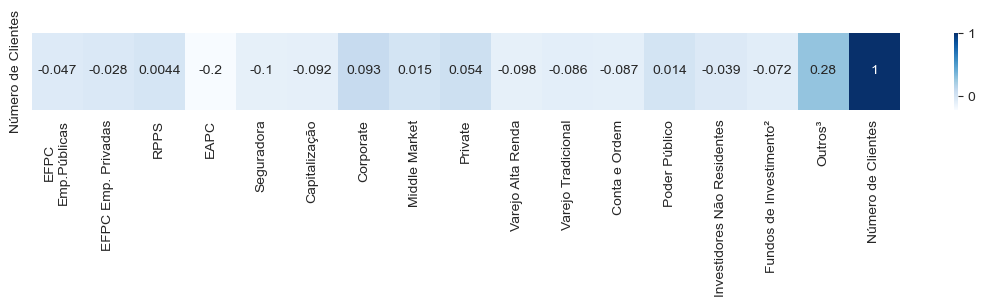


 ---------- Número de Clientes ----------
          Score:0.8

                        Feature  Coeficiente
0            EFPC\nEmp.Públicas     0.028457
1            EFPC Emp. Privadas    -0.036693
2                          RPPS     0.012543
3                          EAPC    -0.495650
4                    Seguradora    -0.102491
5                 Capitalização    -0.021807
6                     Corporate     0.339307
7                 Middle Market    -0.047752
8                       Private     0.490715
9             Varejo Alta Renda    -0.351589
10           Varejo Tradicional    -0.191623
11                Conta e Ordem    -0.270154
12                Poder Público     0.124186
13  Investidores Não Residentes    -0.213703
14      Fundos de Investimento²    -0.315775
15                      Outros³     1.051712


<Figure size 1000x1600 with 0 Axes>

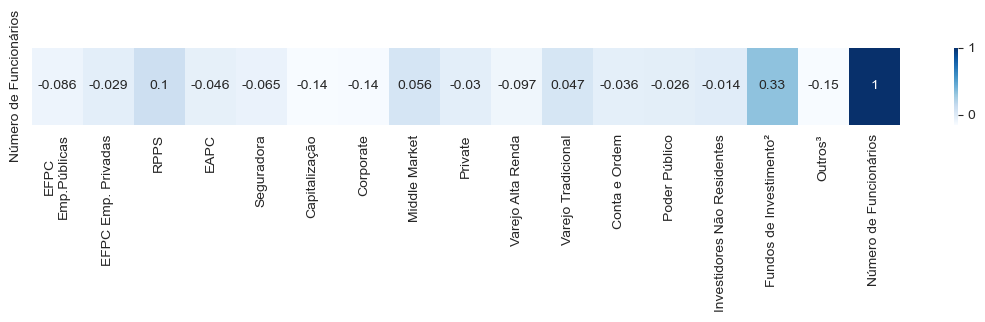


 ---------- Número de Funcionários ----------
          Score:0.7

                        Feature  Coeficiente
0            EFPC\nEmp.Públicas    -0.051912
1            EFPC Emp. Privadas    -0.033991
2                          RPPS     0.303566
3                          EAPC     0.042531
4                    Seguradora    -0.188132
5                 Capitalização    -0.036457
6                     Corporate    -0.649982
7                 Middle Market     0.090806
8                       Private    -0.297143
9             Varejo Alta Renda    -0.277522
10           Varejo Tradicional     0.129562
11                Conta e Ordem    -0.166948
12                Poder Público     0.102622
13  Investidores Não Residentes     0.243781
14      Fundos de Investimento²     1.183842
15                      Outros³    -0.394842


<Figure size 1000x1600 with 0 Axes>

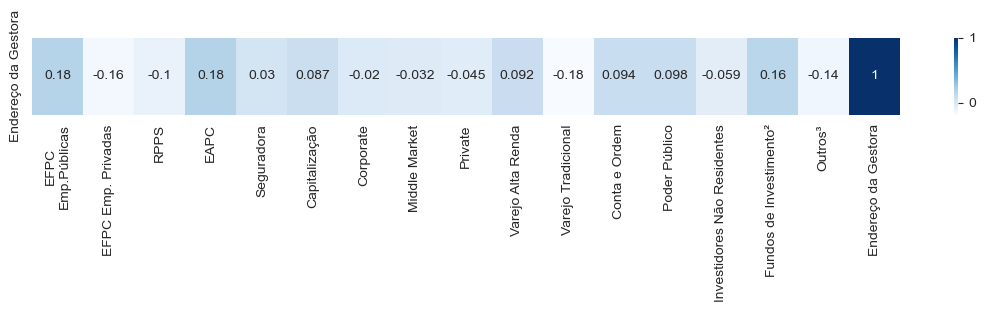


 ---------- Endereço da Gestora ----------
          Score:0.7

                        Feature  Coeficiente
0            EFPC\nEmp.Públicas     0.139351
1            EFPC Emp. Privadas    -0.712172
2                          RPPS    -0.194899
3                          EAPC     0.595393
4                    Seguradora    -0.138111
5                 Capitalização     0.024729
6                     Corporate    -0.320912
7                 Middle Market    -0.045610
8                       Private    -0.214789
9             Varejo Alta Renda     0.453476
10           Varejo Tradicional    -0.562082
11                Conta e Ordem     0.349740
12                Poder Público     0.358887
13  Investidores Não Residentes     0.295821
14      Fundos de Investimento²     0.489025
15                      Outros³    -0.517289


<Figure size 1000x1600 with 0 Axes>

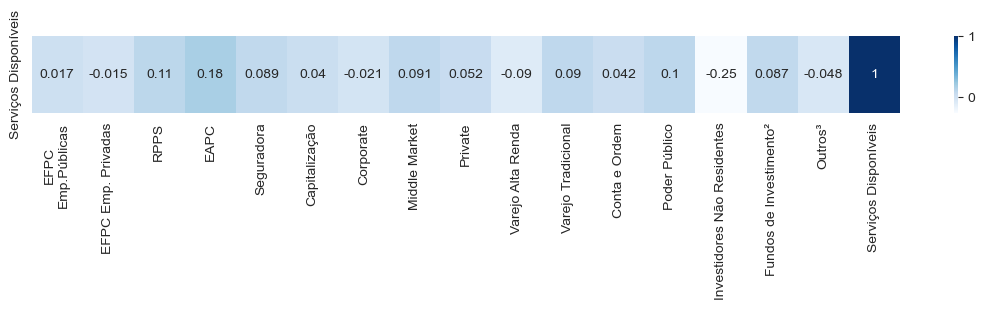


 ---------- Serviços Disponíveis ----------
          Score:0.8

                        Feature  Coeficiente
0            EFPC\nEmp.Públicas     0.023573
1            EFPC Emp. Privadas    -0.140763
2                          RPPS     0.153407
3                          EAPC     0.373748
4                    Seguradora     0.067398
5                 Capitalização     0.003589
6                     Corporate    -0.116749
7                 Middle Market     0.051221
8                       Private     0.452362
9             Varejo Alta Renda    -0.403079
10           Varejo Tradicional     0.171564
11                Conta e Ordem     0.042538
12                Poder Público     0.274178
13  Investidores Não Residentes    -1.207487
14      Fundos de Investimento²     0.394619
15                      Outros³    -0.140069


<Figure size 1000x1600 with 0 Axes>

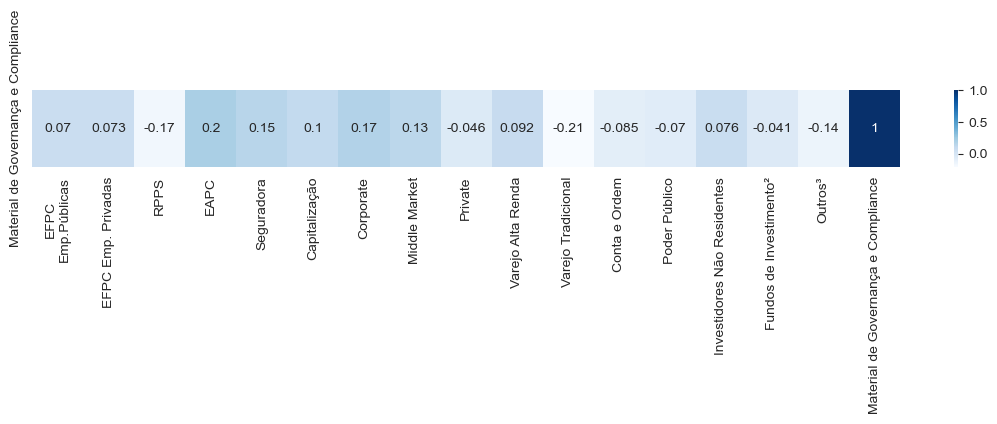


 ---------- Material de Governança e Compliance ----------
          Score:0.8

                        Feature  Coeficiente
0            EFPC\nEmp.Públicas     0.087396
1            EFPC Emp. Privadas     0.270046
2                          RPPS    -0.316872
3                          EAPC     0.514287
4                    Seguradora     0.352885
5                 Capitalização     0.025561
6                     Corporate     0.523864
7                 Middle Market     0.114153
8                       Private    -0.312515
9             Varejo Alta Renda     0.232140
10           Varejo Tradicional    -0.532139
11                Conta e Ordem    -0.413293
12                Poder Público    -0.309122
13  Investidores Não Residentes     0.016713
14      Fundos de Investimento²     0.213501
15                      Outros³    -0.466541


<Figure size 1000x1600 with 0 Axes>

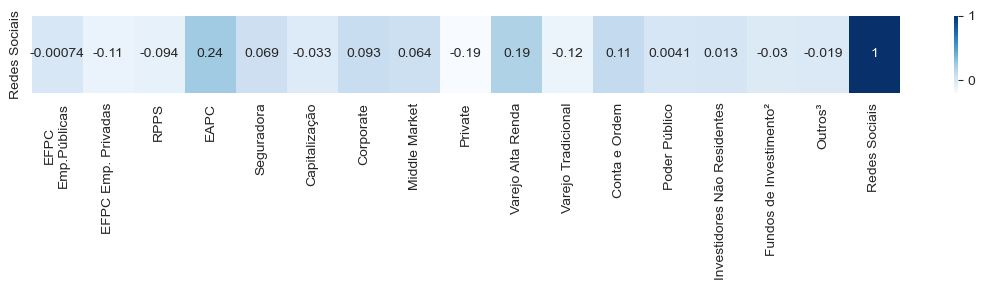


 ---------- Redes Sociais ----------
          Score:0.55

                        Feature  Coeficiente
0            EFPC\nEmp.Públicas    -0.073179
1            EFPC Emp. Privadas    -0.582242
2                          RPPS    -0.244842
3                          EAPC     0.612446
4                    Seguradora     0.232428
5                 Capitalização    -0.039893
6                     Corporate     0.278534
7                 Middle Market    -0.016290
8                       Private    -0.368212
9             Varejo Alta Renda     0.541901
10           Varejo Tradicional    -0.389017
11                Conta e Ordem     0.417512
12                Poder Público    -0.118415
13  Investidores Não Residentes    -0.304429
14      Fundos de Investimento²    -0.064657
15                      Outros³     0.118583


<Figure size 1000x1600 with 0 Axes>

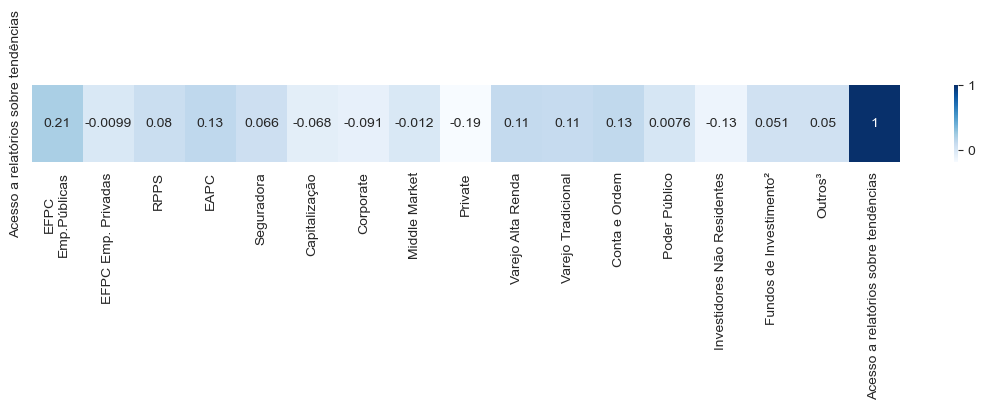


 ---------- Acesso a relatórios sobre tendências ----------
          Score:0.5

                        Feature  Coeficiente
0            EFPC\nEmp.Públicas     0.175118
1            EFPC Emp. Privadas    -0.011075
2                          RPPS     0.164586
3                          EAPC     0.415868
4                    Seguradora    -0.091131
5                 Capitalização    -0.050739
6                     Corporate    -0.294437
7                 Middle Market    -0.020897
8                       Private    -0.644216
9             Varejo Alta Renda     0.569852
10           Varejo Tradicional     0.317642
11                Conta e Ordem     0.479999
12                Poder Público    -0.055434
13  Investidores Não Residentes    -1.391761
14      Fundos de Investimento²     0.414193
15                      Outros³     0.022452


<Figure size 1000x1600 with 0 Axes>

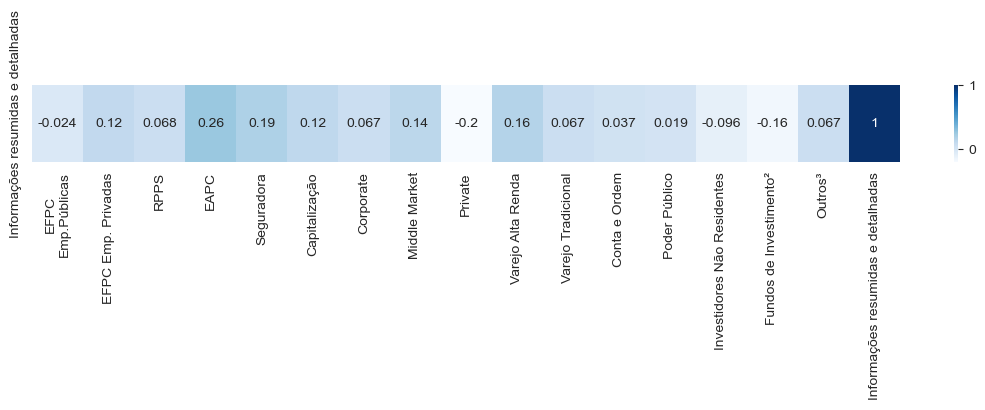


 ---------- Informações resumidas e detalhadas ----------
          Score:0.75

                        Feature  Coeficiente
0            EFPC\nEmp.Públicas    -0.117415
1            EFPC Emp. Privadas     0.308655
2                          RPPS     0.050022
3                          EAPC     0.639177
4                    Seguradora     0.377683
5                 Capitalização     0.027143
6                     Corporate     0.188848
7                 Middle Market     0.103205
8                       Private    -0.963345
9             Varejo Alta Renda     0.465268
10           Varejo Tradicional     0.153044
11                Conta e Ordem    -0.034239
12                Poder Público    -0.124984
13  Investidores Não Residentes    -0.879512
14      Fundos de Investimento²    -0.739415
15                      Outros³     0.545933


<Figure size 1000x1600 with 0 Axes>

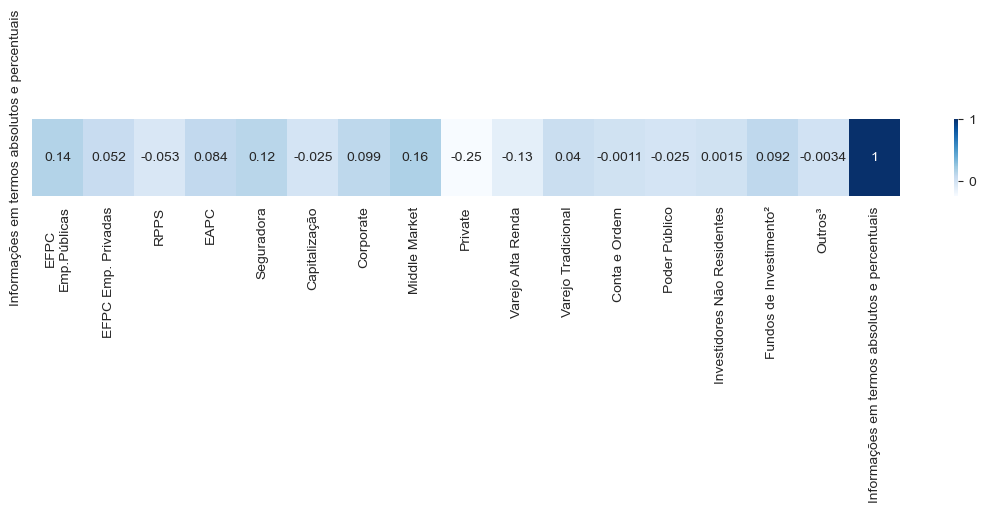


 ---------- Informações em termos absolutos e percentuais ----------
          Score:0.5

                        Feature  Coeficiente
0            EFPC\nEmp.Públicas     0.138175
1            EFPC Emp. Privadas     0.307979
2                          RPPS    -0.122179
3                          EAPC     0.200557
4                    Seguradora     0.163224
5                 Capitalização    -0.032877
6                     Corporate     0.432372
7                 Middle Market     0.158928
8                       Private    -1.019993
9             Varejo Alta Renda    -0.597611
10           Varejo Tradicional     0.158742
11                Conta e Ordem    -0.081400
12                Poder Público    -0.181165
13  Investidores Não Residentes    -0.295943
14      Fundos de Investimento²     0.723942
15                      Outros³     0.047397


<Figure size 1000x1600 with 0 Axes>

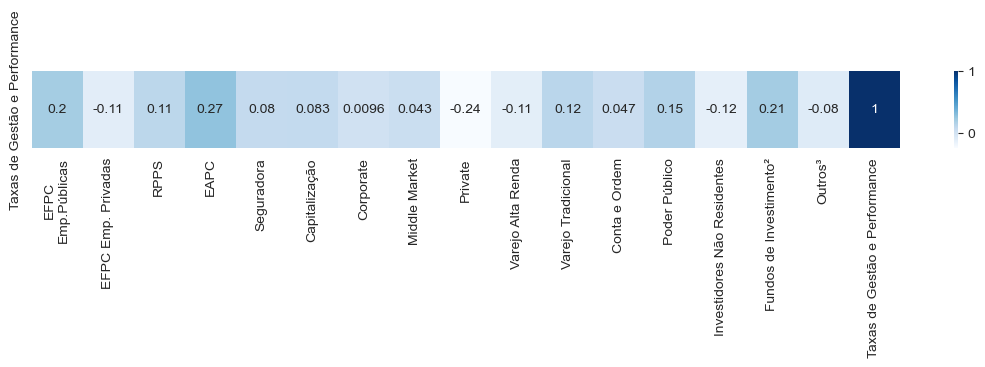


 ---------- Taxas de Gestão e Performance ----------
          Score:0.75

                        Feature  Coeficiente
0            EFPC\nEmp.Públicas     0.204710
1            EFPC Emp. Privadas    -0.517468
2                          RPPS     0.186306
3                          EAPC     0.745287
4                    Seguradora     0.064688
5                 Capitalização     0.018996
6                     Corporate    -0.226700
7                 Middle Market    -0.016500
8                       Private    -0.728371
9             Varejo Alta Renda    -0.536834
10           Varejo Tradicional     0.264300
11                Conta e Ordem     0.039067
12                Poder Público     0.493325
13  Investidores Não Residentes    -0.790879
14      Fundos de Investimento²     0.763779
15                      Outros³     0.036491


<Figure size 1000x1600 with 0 Axes>

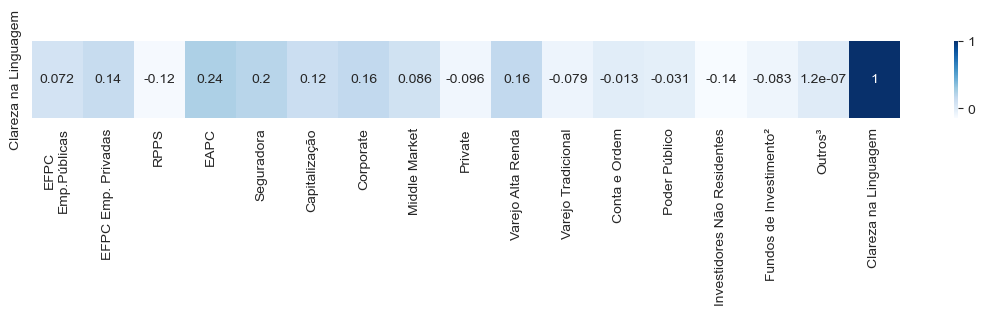


 ---------- Clareza na Linguagem ----------
          Score:0.65

                        Feature  Coeficiente
0            EFPC\nEmp.Públicas    -0.002845
1            EFPC Emp. Privadas     0.502640
2                          RPPS    -0.291657
3                          EAPC     0.603500
4                    Seguradora     0.459853
5                 Capitalização     0.027190
6                     Corporate     0.647569
7                 Middle Market     0.023012
8                       Private    -0.393984
9             Varejo Alta Renda     0.473388
10           Varejo Tradicional    -0.229448
11                Conta e Ordem    -0.159535
12                Poder Público    -0.244867
13  Investidores Não Residentes    -1.058342
14      Fundos de Investimento²    -0.211663
15                      Outros³    -0.144770


<Figure size 1000x1600 with 0 Axes>

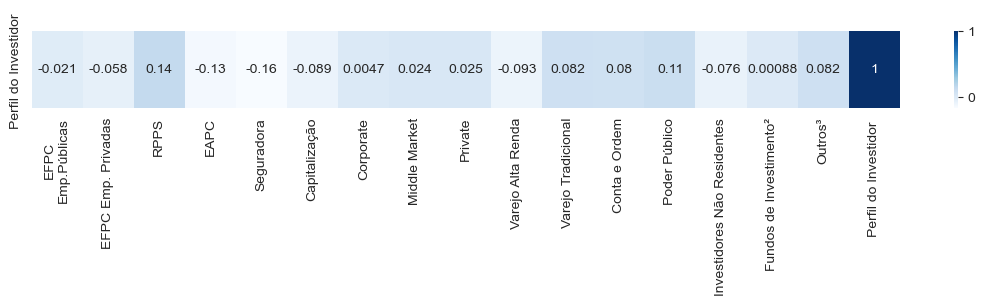


 ---------- Perfil do Investidor  ----------
          Score:0.7

                        Feature  Coeficiente
0            EFPC\nEmp.Públicas    -0.022196
1            EFPC Emp. Privadas    -0.192517
2                          RPPS     0.273780
3                          EAPC    -0.348531
4                    Seguradora    -0.373055
5                 Capitalização    -0.019633
6                     Corporate     0.019038
7                 Middle Market     0.105307
8                       Private     0.198757
9             Varejo Alta Renda    -0.206410
10           Varejo Tradicional     0.236648
11                Conta e Ordem     0.381660
12                Poder Público     0.473126
13  Investidores Não Residentes    -0.280526
14      Fundos de Investimento²    -0.051487
15                      Outros³    -0.194095


([{'AuM': 0.55},
  {'Founders': 0.75},
  {'Gestores': 0.5},
  {'Linha do Tempo': 0.65},
  {'Informe Mensal': 0.6},
  {'Estratégias de Investimento': 0.55},
  {'Geografia de Atuação': 0.55},
  {'Número de Clientes': 0.8},
  {'Número de Funcionários': 0.7},
  {'Endereço da Gestora': 0.7},
  {'Serviços Disponíveis': 0.8},
  {'Material de Governança e Compliance': 0.8},
  {'Redes Sociais': 0.55},
  {'Acesso a relatórios sobre tendências': 0.5},
  {'Informações resumidas e detalhadas': 0.75},
  {'Informações em termos absolutos e percentuais': 0.5},
  {'Taxas de Gestão e Performance': 0.75},
  {'Clareza na Linguagem': 0.65},
  {'Perfil do Investidor ': 0.7}],
 [                        Feature  Coeficiente
  0            EFPC\nEmp.Públicas     0.208729
  1            EFPC Emp. Privadas     0.215816
  2                          RPPS     0.167513
  3                          EAPC     0.258656
  4                    Seguradora    -0.315506
  5                 Capitalização    -0.065331
  6     

<Figure size 1000x1600 with 0 Axes>

In [40]:
relacao_outros_coef(df2, dfAvaliacaoSites, fig = (14,1))

In [50]:
df3 = pd.read_excel('TCCtena.xlsx', sheet_name= 'Anbimadata',
                  skiprows=2, usecols='P:V')

In [65]:
df3.isna().sum()

FIC Multigestor    20
FIC Espelho        20
FIC Feeder         20
FI Multigestor     20
FI Espelho         20
FI Feeder          20
Total               0
dtype: int64

In [66]:
df3.fillna(0, inplace= True)

In [67]:
df3.isna().sum()

FIC Multigestor    0
FIC Espelho        0
FIC Feeder         0
FI Multigestor     0
FI Espelho         0
FI Feeder          0
Total              0
dtype: int64

In [54]:
for coluna in df3.columns[:-1]:
    df3[coluna] = (df3[coluna].astype(float)/df3['Total']).round(4)

In [70]:
relacao_outros(df3, dfAvaliacaoSites)

[{'AuM': 0.55},
 {'Founders': 0.8},
 {'Gestores': 0.5},
 {'Linha do Tempo': 0.85},
 {'Informe Mensal': 0.7},
 {'Estratégias de Investimento': 0.55},
 {'Geografia de Atuação': 0.55},
 {'Número de Clientes': 0.75},
 {'Número de Funcionários': 0.25},
 {'Endereço da Gestora': 0.6},
 {'Serviços Disponíveis': 0.8},
 {'Material de Governança e Compliance': 0.8},
 {'Redes Sociais': 0.55},
 {'Acesso a relatórios sobre tendências': 0.5},
 {'Informações resumidas e detalhadas': 0.75},
 {'Informações em termos absolutos e percentuais': 0.6},
 {'Taxas de Gestão e Performance': 0.7},
 {'Clareza na Linguagem': 0.75},
 {'Perfil do Investidor ': 0.7}]

<Figure size 800x1000 with 0 Axes>

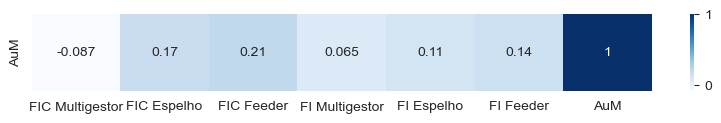


 ---------- AuM ----------
          Score:0.55

           Feature  Coeficiente
0  FIC Multigestor    -0.135137
1      FIC Espelho     0.808074
2       FIC Feeder     0.730481
3   FI Multigestor     0.076426
4       FI Espelho     0.360192
5        FI Feeder     0.620804


<Figure size 1000x1600 with 0 Axes>

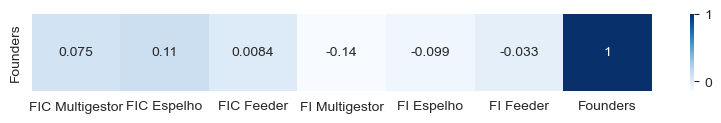


 ---------- Founders ----------
          Score:0.8

           Feature  Coeficiente
0  FIC Multigestor     0.579290
1      FIC Espelho     0.602385
2       FIC Feeder     0.078511
3   FI Multigestor    -0.439908
4       FI Espelho    -0.328252
5        FI Feeder    -0.018914


<Figure size 1000x1600 with 0 Axes>

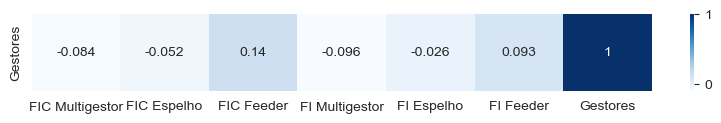


 ---------- Gestores ----------
          Score:0.5

           Feature  Coeficiente
0  FIC Multigestor    -0.268123
1      FIC Espelho     0.129531
2       FIC Feeder     0.653172
3   FI Multigestor    -0.476614
4       FI Espelho    -0.014340
5        FI Feeder     0.439056


<Figure size 1000x1600 with 0 Axes>

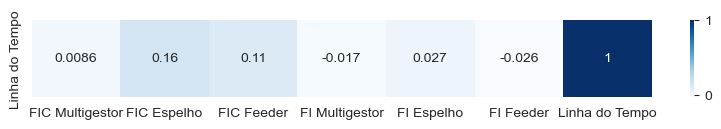


 ---------- Linha do Tempo ----------
          Score:0.85

           Feature  Coeficiente
0  FIC Multigestor     0.444395
1      FIC Espelho     0.699835
2       FIC Feeder     0.411902
3   FI Multigestor    -0.029918
4       FI Espelho     0.084978
5        FI Feeder     0.021736


<Figure size 1000x1600 with 0 Axes>

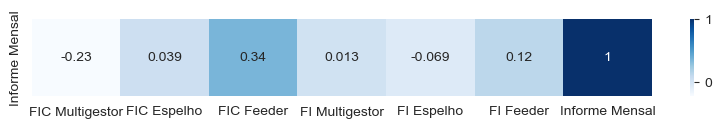


 ---------- Informe Mensal ----------
          Score:0.7

           Feature  Coeficiente
0  FIC Multigestor    -0.672606
1      FIC Espelho     0.344210
2       FIC Feeder     1.337478
3   FI Multigestor    -0.041700
4       FI Espelho    -0.172329
5        FI Feeder     0.584154


<Figure size 1000x1600 with 0 Axes>

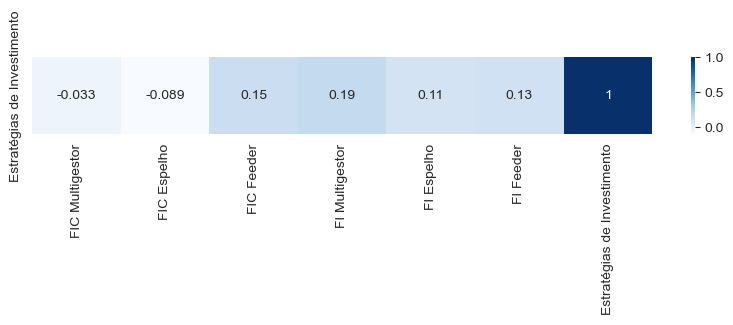


 ---------- Estratégias de Investimento ----------
          Score:0.55

           Feature  Coeficiente
0  FIC Multigestor    -0.000205
1      FIC Espelho    -0.537249
2       FIC Feeder     0.445265
3   FI Multigestor     0.557655
4       FI Espelho     0.368377
5        FI Feeder     0.496153


<Figure size 1000x1600 with 0 Axes>

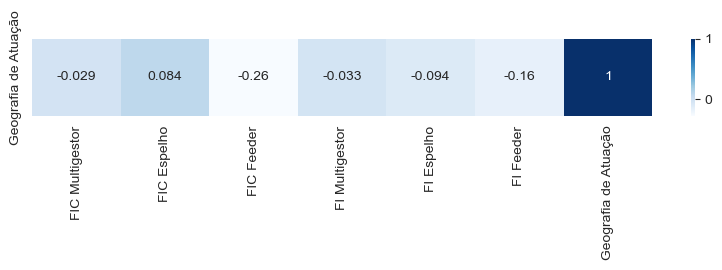


 ---------- Geografia de Atuação ----------
          Score:0.55

           Feature  Coeficiente
0  FIC Multigestor    -0.274023
1      FIC Espelho     0.069656
2       FIC Feeder    -0.963058
3   FI Multigestor    -0.104318
4       FI Espelho    -0.362344
5        FI Feeder    -0.683296


<Figure size 1000x1600 with 0 Axes>

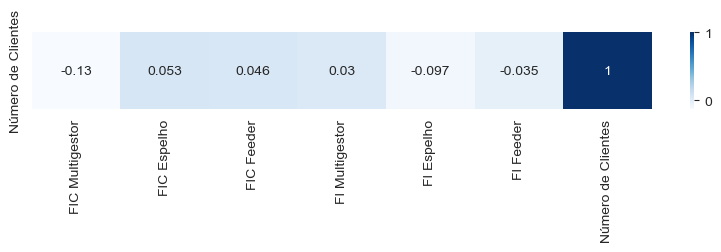


 ---------- Número de Clientes ----------
          Score:0.75

           Feature  Coeficiente
0  FIC Multigestor    -0.281213
1      FIC Espelho     0.389626
2       FIC Feeder     0.181170
3   FI Multigestor     0.287814
4       FI Espelho    -0.288504
5        FI Feeder    -0.000302


<Figure size 1000x1600 with 0 Axes>

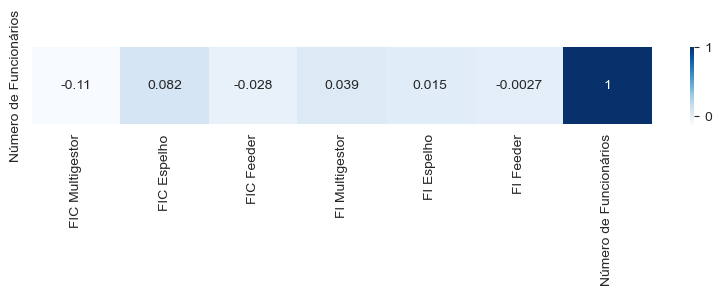


 ---------- Número de Funcionários ----------
          Score:0.25

           Feature  Coeficiente
0  FIC Multigestor    -0.455793
1      FIC Espelho     0.595039
2       FIC Feeder     0.097316
3   FI Multigestor    -0.052098
4       FI Espelho     0.052123
5        FI Feeder     0.215656


<Figure size 1000x1600 with 0 Axes>

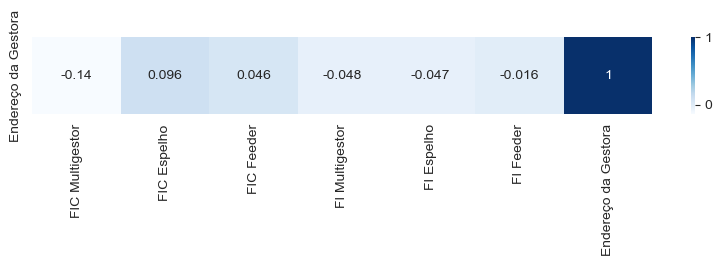


 ---------- Endereço da Gestora ----------
          Score:0.6

           Feature  Coeficiente
0  FIC Multigestor    -0.958772
1      FIC Espelho     0.520218
2       FIC Feeder    -0.011515
3   FI Multigestor    -0.208578
4       FI Espelho    -0.181630
5        FI Feeder     0.172094


<Figure size 1000x1600 with 0 Axes>

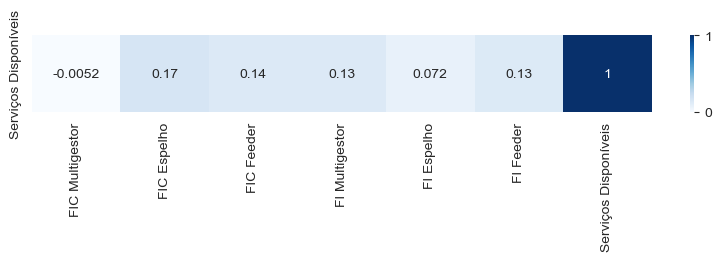


 ---------- Serviços Disponíveis ----------
          Score:0.8

           Feature  Coeficiente
0  FIC Multigestor     0.341960
1      FIC Espelho     0.804855
2       FIC Feeder     0.669143
3   FI Multigestor     0.301040
4       FI Espelho     0.216610
5        FI Feeder     0.526203


<Figure size 1000x1600 with 0 Axes>

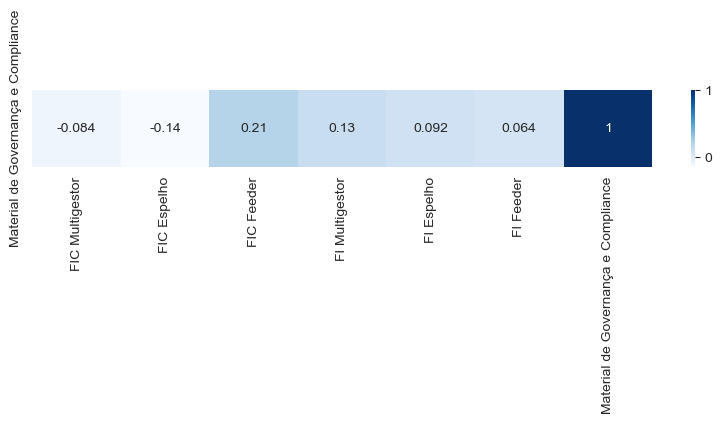


 ---------- Material de Governança e Compliance ----------
          Score:0.8

           Feature  Coeficiente
0  FIC Multigestor    -0.480082
1      FIC Espelho    -0.487809
2       FIC Feeder     1.094424
3   FI Multigestor     0.364050
4       FI Espelho     0.337940
5        FI Feeder     0.307171


<Figure size 1000x1600 with 0 Axes>

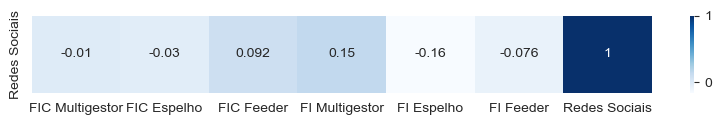


 ---------- Redes Sociais ----------
          Score:0.55

           Feature  Coeficiente
0  FIC Multigestor     0.138253
1      FIC Espelho    -0.273534
2       FIC Feeder     0.315107
3   FI Multigestor     0.359222
4       FI Espelho    -0.509766
5        FI Feeder    -0.541195


<Figure size 1000x1600 with 0 Axes>

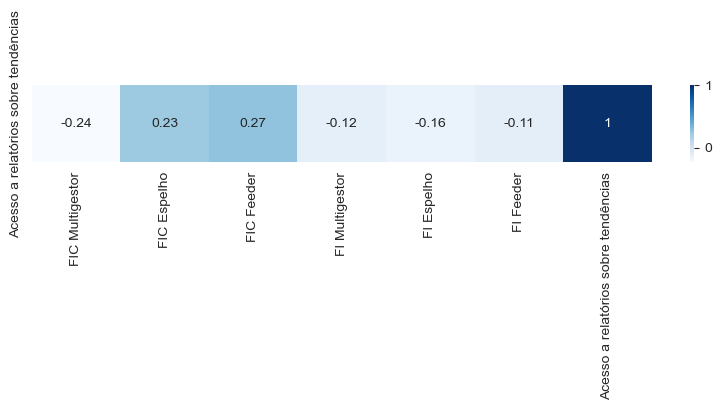


 ---------- Acesso a relatórios sobre tendências ----------
          Score:0.5

           Feature  Coeficiente
0  FIC Multigestor    -0.711698
1      FIC Espelho     1.589255
2       FIC Feeder     1.146231
3   FI Multigestor    -0.041035
4       FI Espelho    -0.390099
5        FI Feeder    -0.471426


<Figure size 1000x1600 with 0 Axes>

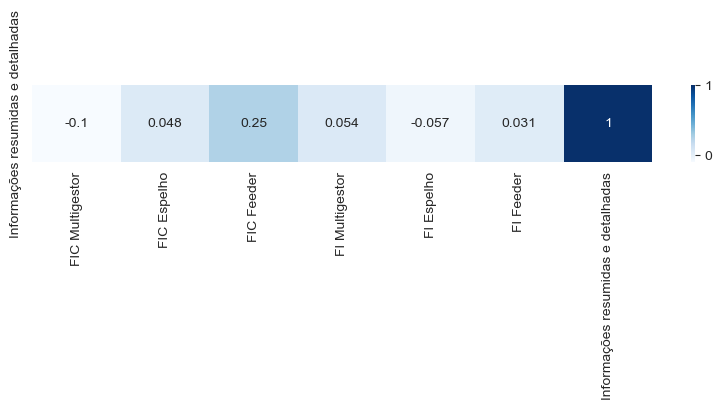


 ---------- Informações resumidas e detalhadas ----------
          Score:0.75

           Feature  Coeficiente
0  FIC Multigestor    -0.293237
1      FIC Espelho     0.342064
2       FIC Feeder     0.917897
3   FI Multigestor     0.043242
4       FI Espelho    -0.124033
5        FI Feeder     0.135438


<Figure size 1000x1600 with 0 Axes>

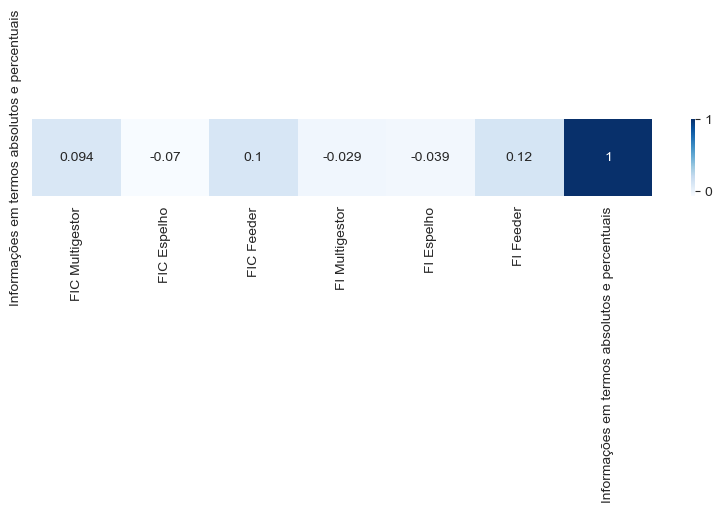


 ---------- Informações em termos absolutos e percentuais ----------
          Score:0.6

           Feature  Coeficiente
0  FIC Multigestor     0.584101
1      FIC Espelho    -0.287278
2       FIC Feeder     0.482361
3   FI Multigestor    -0.343116
4       FI Espelho    -0.095757
5        FI Feeder     0.572409


<Figure size 1000x1600 with 0 Axes>

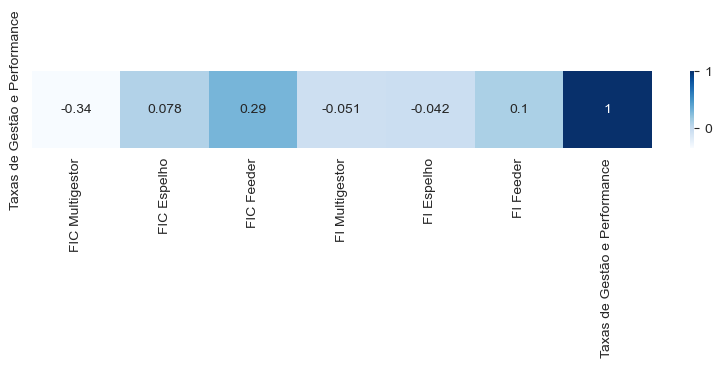


 ---------- Taxas de Gestão e Performance ----------
          Score:0.7

           Feature  Coeficiente
0  FIC Multigestor    -1.218981
1      FIC Espelho     0.543158
2       FIC Feeder     1.379206
3   FI Multigestor    -0.244750
4       FI Espelho    -0.086071
5        FI Feeder     0.505884


<Figure size 1000x1600 with 0 Axes>

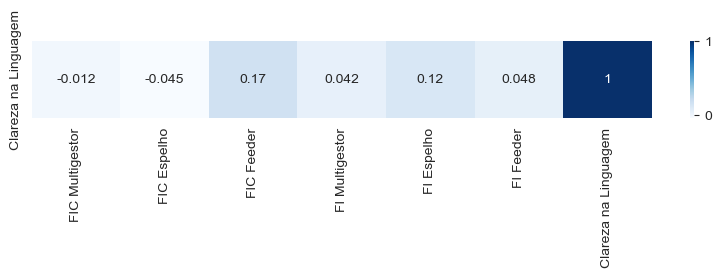


 ---------- Clareza na Linguagem ----------
          Score:0.75

           Feature  Coeficiente
0  FIC Multigestor     0.172928
1      FIC Espelho    -0.076403
2       FIC Feeder     0.728747
3   FI Multigestor     0.010389
4       FI Espelho     0.474274
5        FI Feeder     0.229802


<Figure size 1000x1600 with 0 Axes>

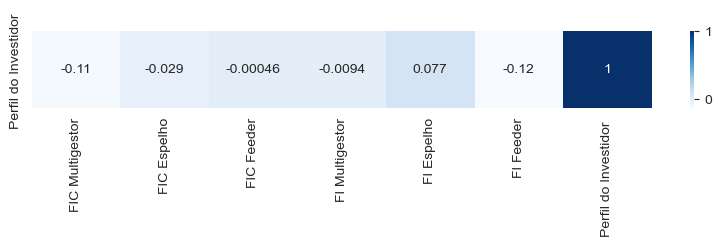


 ---------- Perfil do Investidor  ----------
          Score:0.7

           Feature  Coeficiente
0  FIC Multigestor    -0.322636
1      FIC Espelho    -0.301089
2       FIC Feeder    -0.413994
3   FI Multigestor     0.148337
4       FI Espelho     0.212075
5        FI Feeder    -0.537354


([{'AuM': 0.55},
  {'Founders': 0.8},
  {'Gestores': 0.5},
  {'Linha do Tempo': 0.85},
  {'Informe Mensal': 0.7},
  {'Estratégias de Investimento': 0.55},
  {'Geografia de Atuação': 0.55},
  {'Número de Clientes': 0.75},
  {'Número de Funcionários': 0.25},
  {'Endereço da Gestora': 0.6},
  {'Serviços Disponíveis': 0.8},
  {'Material de Governança e Compliance': 0.8},
  {'Redes Sociais': 0.55},
  {'Acesso a relatórios sobre tendências': 0.5},
  {'Informações resumidas e detalhadas': 0.75},
  {'Informações em termos absolutos e percentuais': 0.6},
  {'Taxas de Gestão e Performance': 0.7},
  {'Clareza na Linguagem': 0.75},
  {'Perfil do Investidor ': 0.7}],
 [           Feature  Coeficiente
  0  FIC Multigestor    -0.135137
  1      FIC Espelho     0.808074
  2       FIC Feeder     0.730481
  3   FI Multigestor     0.076426
  4       FI Espelho     0.360192
  5        FI Feeder     0.620804,
             Feature  Coeficiente
  0  FIC Multigestor     0.579290
  1      FIC Espelho     0.602

<Figure size 1000x1600 with 0 Axes>

In [71]:
relacao_outros_coef(df3, dfAvaliacaoSites)

In [72]:
df4 = pd.read_excel('TCCtena.xlsx', sheet_name= 'Anbimadata',
                  skiprows=2, usecols='AP:AX')

In [73]:
df4.isna().sum()

Renda Fixa.1       36
Ações.1            28
Multimercados.1     6
Cambial.1          84
Previdência.1      35
ETF.1              92
FIDC.1             55
FIP.1              59
12 meses            1
dtype: int64

In [78]:
df4.fillna(0, inplace= True)

In [79]:
df4.isna().sum()

Renda Fixa.1       0
Ações.1            0
Multimercados.1    0
Cambial.1          0
Previdência.1      0
ETF.1              0
FIDC.1             0
FIP.1              0
12 meses           0
dtype: int64

In [75]:
for coluna in df4.columns[:-1]:
    df4[coluna] = (df4[coluna].astype(float)/df4['12 meses']).round(4)

In [80]:
relacao_outros(df4, dfAvaliacaoSites)

[{'AuM': 0.55},
 {'Founders': 0.85},
 {'Gestores': 0.7},
 {'Linha do Tempo': 0.55},
 {'Informe Mensal': 0.65},
 {'Estratégias de Investimento': 0.6},
 {'Geografia de Atuação': 0.55},
 {'Número de Clientes': 0.75},
 {'Número de Funcionários': 0.65},
 {'Endereço da Gestora': 0.65},
 {'Serviços Disponíveis': 0.8},
 {'Material de Governança e Compliance': 0.8},
 {'Redes Sociais': 0.55},
 {'Acesso a relatórios sobre tendências': 0.5},
 {'Informações resumidas e detalhadas': 0.7},
 {'Informações em termos absolutos e percentuais': 0.25},
 {'Taxas de Gestão e Performance': 0.75},
 {'Clareza na Linguagem': 0.7},
 {'Perfil do Investidor ': 0.7}]

<Figure size 800x1000 with 0 Axes>

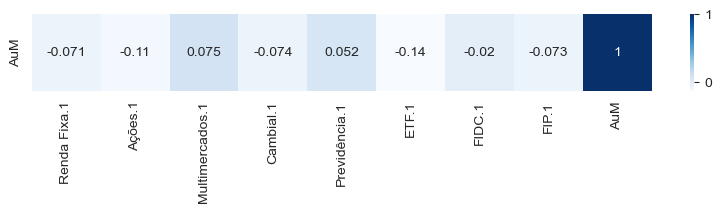


 ---------- AuM ----------
          Score:0.55

           Feature  Coeficiente
0     Renda Fixa.1    -0.335173
1          Ações.1     0.336700
2  Multimercados.1     0.244794
3        Cambial.1    -0.014957
4    Previdência.1     0.789318
5            ETF.1    -0.510196
6           FIDC.1     0.085489
7            FIP.1     0.061405


<Figure size 1000x1600 with 0 Axes>

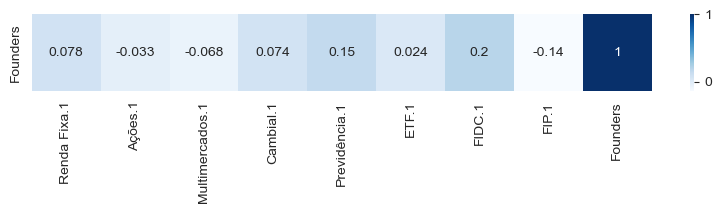


 ---------- Founders ----------
          Score:0.85

           Feature  Coeficiente
0     Renda Fixa.1     0.092977
1          Ações.1    -0.289889
2  Multimercados.1     0.046598
3        Cambial.1     0.051434
4    Previdência.1    -0.170090
5            ETF.1    -0.210965
6           FIDC.1     0.880156
7            FIP.1    -0.063800


<Figure size 1000x1600 with 0 Axes>

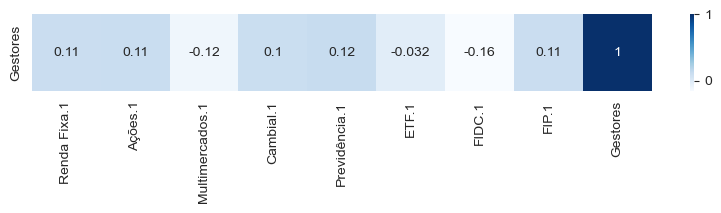


 ---------- Gestores ----------
          Score:0.7

           Feature  Coeficiente
0     Renda Fixa.1    -0.158010
1          Ações.1    -0.016424
2  Multimercados.1    -0.136896
3        Cambial.1    -0.175985
4    Previdência.1     0.708437
5            ETF.1    -0.095222
6           FIDC.1    -0.814473
7            FIP.1     0.251232


<Figure size 1000x1600 with 0 Axes>

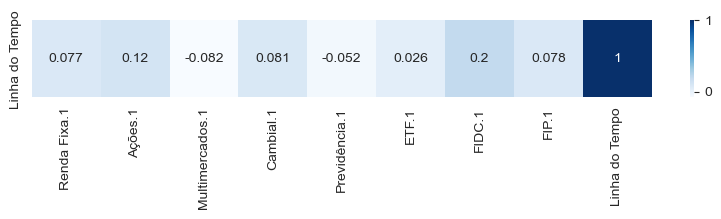


 ---------- Linha do Tempo ----------
          Score:0.55

           Feature  Coeficiente
0     Renda Fixa.1    -0.096726
1          Ações.1    -0.425263
2  Multimercados.1    -0.131060
3        Cambial.1     0.076614
4    Previdência.1    -0.401333
5            ETF.1    -0.274800
6           FIDC.1     0.404361
7            FIP.1     0.325899


<Figure size 1000x1600 with 0 Axes>

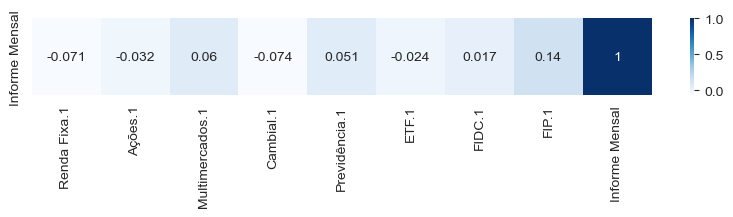


 ---------- Informe Mensal ----------
          Score:0.65

           Feature  Coeficiente
0     Renda Fixa.1    -0.465242
1          Ações.1    -0.265512
2  Multimercados.1    -0.029695
3        Cambial.1    -0.008454
4    Previdência.1     0.190550
5            ETF.1     0.218428
6           FIDC.1    -0.294678
7            FIP.1     0.360425


<Figure size 1000x1600 with 0 Axes>

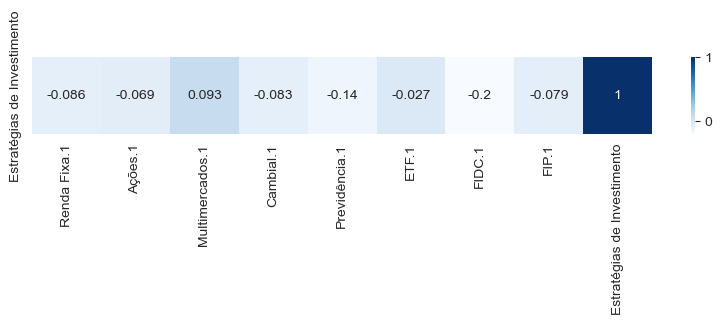


 ---------- Estratégias de Investimento ----------
          Score:0.6

           Feature  Coeficiente
0     Renda Fixa.1    -0.105722
1          Ações.1     0.061908
2  Multimercados.1     0.139881
3        Cambial.1    -0.013445
4    Previdência.1    -0.022466
5            ETF.1     0.260840
6           FIDC.1    -0.618712
7            FIP.1    -0.055873


<Figure size 1000x1600 with 0 Axes>

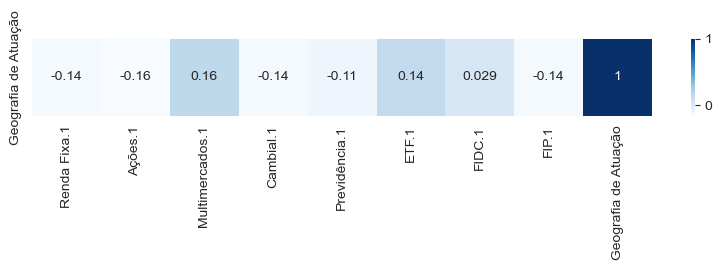


 ---------- Geografia de Atuação ----------
          Score:0.55

           Feature  Coeficiente
0     Renda Fixa.1    -0.210336
1          Ações.1    -0.109733
2  Multimercados.1    -0.199203
3        Cambial.1     0.107586
4    Previdência.1    -0.813646
5            ETF.1     0.754525
6           FIDC.1     0.223444
7            FIP.1    -0.430316


<Figure size 1000x1600 with 0 Axes>

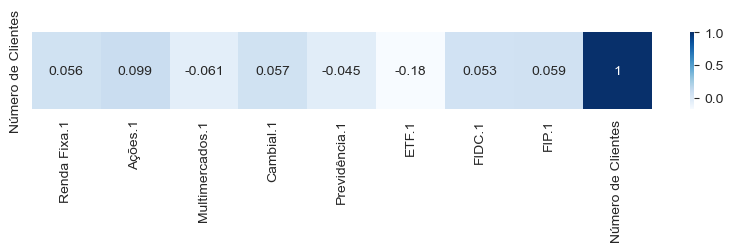


 ---------- Número de Clientes ----------
          Score:0.75

           Feature  Coeficiente
0     Renda Fixa.1     0.157088
1          Ações.1     0.353531
2  Multimercados.1     0.166368
3        Cambial.1    -0.054439
4    Previdência.1    -0.156310
5            ETF.1    -0.419702
6           FIDC.1     0.125089
7            FIP.1     0.078593


<Figure size 1000x1600 with 0 Axes>

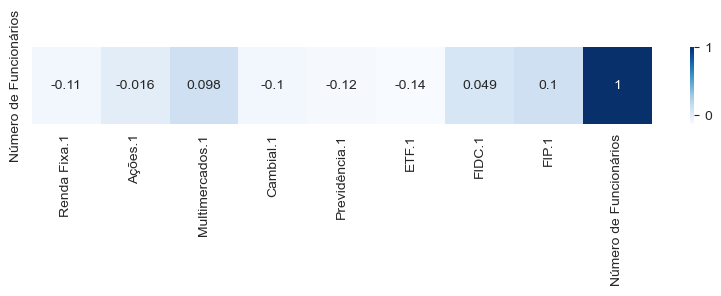


 ---------- Número de Funcionários ----------
          Score:0.65

           Feature  Coeficiente
0     Renda Fixa.1    -0.195359
1          Ações.1     0.261651
2  Multimercados.1    -0.018890
3        Cambial.1     0.015054
4    Previdência.1     0.022442
5            ETF.1    -0.404303
6           FIDC.1    -0.029136
7            FIP.1    -0.129830


<Figure size 1000x1600 with 0 Axes>

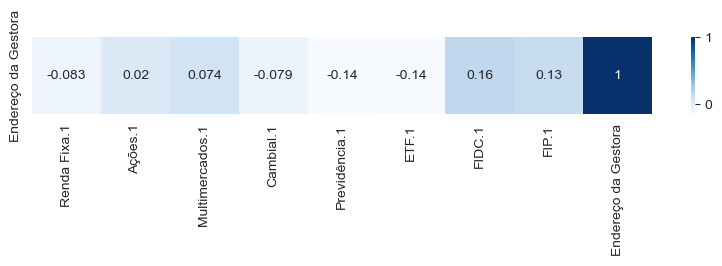


 ---------- Endereço da Gestora ----------
          Score:0.65

           Feature  Coeficiente
0     Renda Fixa.1    -0.554539
1          Ações.1    -0.154466
2  Multimercados.1    -0.148156
3        Cambial.1     0.020112
4    Previdência.1     0.111571
5            ETF.1    -0.509450
6           FIDC.1     0.305254
7            FIP.1     0.593784


<Figure size 1000x1600 with 0 Axes>

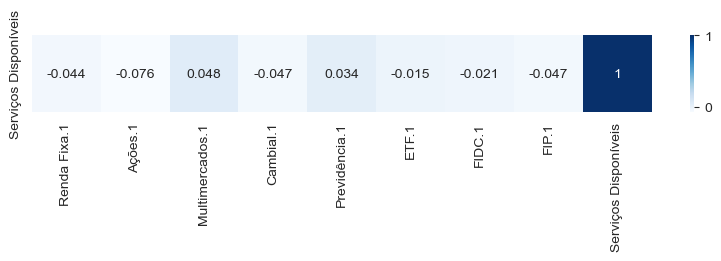


 ---------- Serviços Disponíveis ----------
          Score:0.8

           Feature  Coeficiente
0     Renda Fixa.1     0.177060
1          Ações.1    -0.058680
2  Multimercados.1     0.306849
3        Cambial.1    -0.007636
4    Previdência.1     0.626847
5            ETF.1     0.134298
6           FIDC.1    -0.031576
7            FIP.1    -0.327052


<Figure size 1000x1600 with 0 Axes>

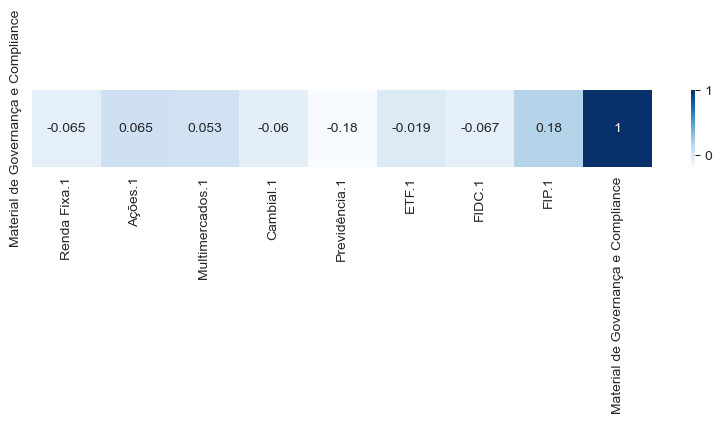


 ---------- Material de Governança e Compliance ----------
          Score:0.8

           Feature  Coeficiente
0     Renda Fixa.1    -0.187138
1          Ações.1     0.171949
2  Multimercados.1     0.230642
3        Cambial.1    -0.006729
4    Previdência.1     0.444958
5            ETF.1     0.183831
6           FIDC.1    -0.495869
7            FIP.1     0.417230


<Figure size 1000x1600 with 0 Axes>

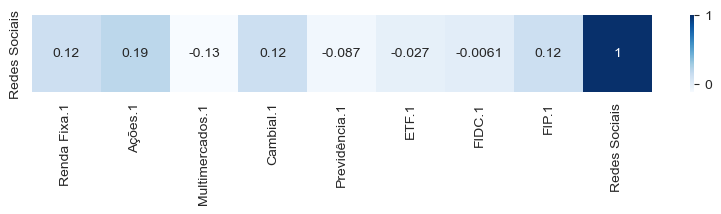


 ---------- Redes Sociais ----------
          Score:0.55

           Feature  Coeficiente
0     Renda Fixa.1     0.036913
1          Ações.1     0.304059
2  Multimercados.1     0.052207
3        Cambial.1    -0.087388
4    Previdência.1    -0.264298
5            ETF.1     0.194299
6           FIDC.1    -0.371073
7            FIP.1    -0.223265


<Figure size 1000x1600 with 0 Axes>

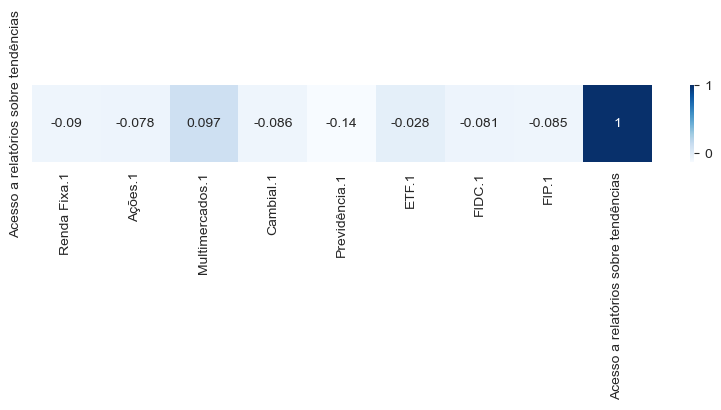


 ---------- Acesso a relatórios sobre tendências ----------
          Score:0.5

           Feature  Coeficiente
0     Renda Fixa.1    -0.107446
1          Ações.1     0.202059
2  Multimercados.1     0.677267
3        Cambial.1    -0.014917
4    Previdência.1    -0.161581
5            ETF.1     0.329090
6           FIDC.1     0.039005
7            FIP.1    -0.427005


<Figure size 1000x1600 with 0 Axes>

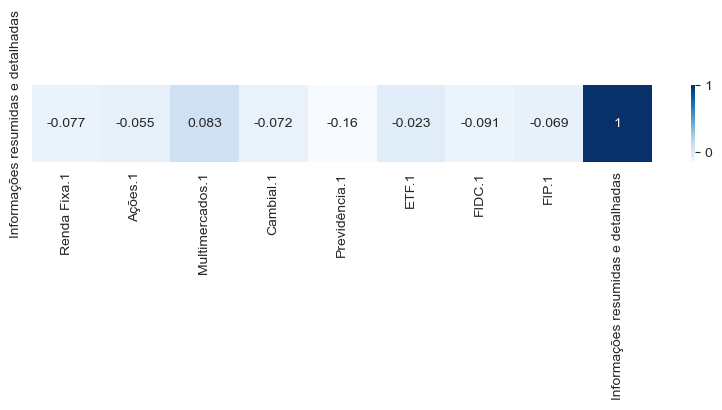


 ---------- Informações resumidas e detalhadas ----------
          Score:0.7

           Feature  Coeficiente
0     Renda Fixa.1    -0.075689
1          Ações.1    -0.119666
2  Multimercados.1     0.270980
3        Cambial.1    -0.012865
4    Previdência.1    -0.056815
5            ETF.1     0.241019
6           FIDC.1    -0.274676
7            FIP.1    -0.293778


<Figure size 1000x1600 with 0 Axes>

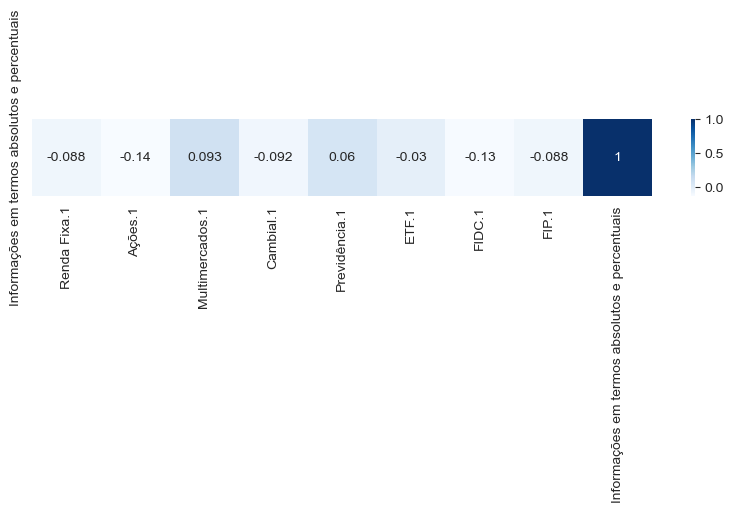


 ---------- Informações em termos absolutos e percentuais ----------
          Score:0.25

           Feature  Coeficiente
0     Renda Fixa.1    -0.416001
1          Ações.1    -0.007045
2  Multimercados.1     0.008211
3        Cambial.1    -0.017014
4    Previdência.1     0.358687
5            ETF.1     0.320263
6           FIDC.1    -0.437485
7            FIP.1    -0.251263


<Figure size 1000x1600 with 0 Axes>

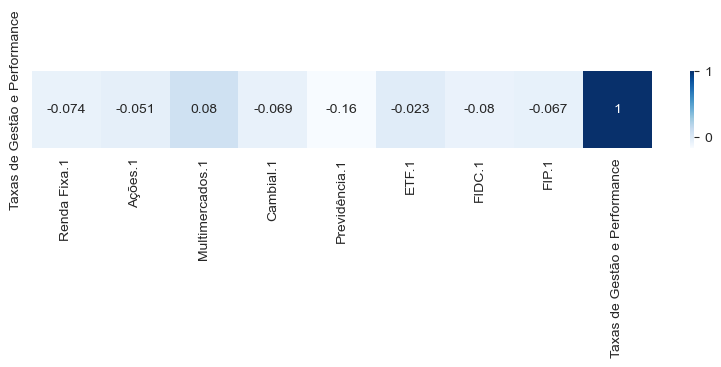


 ---------- Taxas de Gestão e Performance ----------
          Score:0.75

           Feature  Coeficiente
0     Renda Fixa.1    -0.206742
1          Ações.1     0.058923
2  Multimercados.1     0.423148
3        Cambial.1     0.012437
4    Previdência.1     0.594553
5            ETF.1     0.226834
6           FIDC.1    -0.249035
7            FIP.1    -0.169820


<Figure size 1000x1600 with 0 Axes>

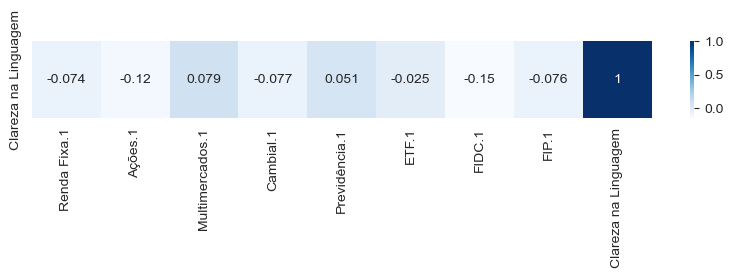


 ---------- Clareza na Linguagem ----------
          Score:0.7

           Feature  Coeficiente
0     Renda Fixa.1     0.039897
1          Ações.1    -0.029328
2  Multimercados.1     0.381269
3        Cambial.1    -0.014234
4    Previdência.1     0.391182
5            ETF.1     0.303394
6           FIDC.1    -0.326775
7            FIP.1    -0.160221


<Figure size 1000x1600 with 0 Axes>

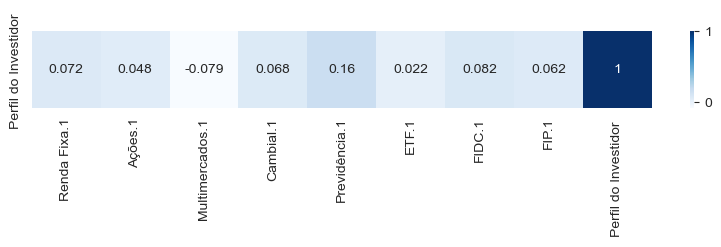


 ---------- Perfil do Investidor  ----------
          Score:0.7

           Feature  Coeficiente
0     Renda Fixa.1     0.262812
1          Ações.1     0.094383
2  Multimercados.1    -0.289065
3        Cambial.1     0.014907
4    Previdência.1    -0.380980
5            ETF.1    -0.219573
6           FIDC.1     0.143622
7            FIP.1    -0.334616


([{'AuM': 0.55},
  {'Founders': 0.85},
  {'Gestores': 0.7},
  {'Linha do Tempo': 0.55},
  {'Informe Mensal': 0.65},
  {'Estratégias de Investimento': 0.6},
  {'Geografia de Atuação': 0.55},
  {'Número de Clientes': 0.75},
  {'Número de Funcionários': 0.65},
  {'Endereço da Gestora': 0.65},
  {'Serviços Disponíveis': 0.8},
  {'Material de Governança e Compliance': 0.8},
  {'Redes Sociais': 0.55},
  {'Acesso a relatórios sobre tendências': 0.5},
  {'Informações resumidas e detalhadas': 0.7},
  {'Informações em termos absolutos e percentuais': 0.25},
  {'Taxas de Gestão e Performance': 0.75},
  {'Clareza na Linguagem': 0.7},
  {'Perfil do Investidor ': 0.7}],
 [           Feature  Coeficiente
  0     Renda Fixa.1    -0.335173
  1          Ações.1     0.336700
  2  Multimercados.1     0.244794
  3        Cambial.1    -0.014957
  4    Previdência.1     0.789318
  5            ETF.1    -0.510196
  6           FIDC.1     0.085489
  7            FIP.1     0.061405,
             Feature  Coefic

<Figure size 1000x1600 with 0 Axes>

In [81]:
relacao_outros_coef(df4, dfAvaliacaoSites)

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [125]:
def reg_linear_pontuacao(df_pl, df_avaliacao):
    lista = []
    dfTeste = df_pl.copy()
    dfTeste['Soma'] = df_avaliacao['Soma']

    scaler = StandardScaler()

    
    X = dfTeste[dfTeste.columns[:-2]]
    y = dfTeste['Soma']
    # Remodelar y para uma matriz bidimensional
    y = y.values.reshape(-1, 1)
    
    y = scaler.fit_transform(y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    y_train.shape, y_test.shape
    mod_regl= LinearRegression()
    mod_regl.fit(X_train, y_train)
    mod_regl.score(X_train, y_train)
    
     # Coeficientes do modelo
    coeficientes = pd.DataFrame({
        'Variável': X.columns,
        'Coeficiente': mod_regl.coef_[0]  # Os coeficientes estão em um array bidimensional, então usamos [0]
    })
    
    # Fazer previsões no conjunto de teste
    y_pred = mod_regl.predict(X_test)

    # Avaliar o modelo
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return r2, coeficientes

In [124]:
reg_linear_pontuacao(df, dfAvaliacaoSites)

(-0.4286377892645976,
         Variável  Coeficiente
 0     Renda Fixa   -16.595658
 1          Ações   -17.014608
 2  Multimercados   -16.432898
 3        Cambial   147.848778
 4    Previdência   -14.456902
 5            ETF   -15.963581
 6           FIDC   -16.531218
 7            FIP   -17.635029
 8            FII   -17.563249
 9      Off-Shore   -15.655635)

In [126]:
reg_linear_pontuacao(df2, dfAvaliacaoSites)

(-0.018524036561427204,
                        Variável  Coeficiente
 0            EFPC\nEmp.Públicas     6.167796
 1            EFPC Emp. Privadas    -0.033965
 2                          RPPS     1.641469
 3                          EAPC     4.266468
 4                    Seguradora     3.286890
 5                 Capitalização   -22.788498
 6                     Corporate     1.063830
 7                 Middle Market     2.569562
 8                       Private    -0.098032
 9             Varejo Alta Renda     1.152098
 10           Varejo Tradicional    -0.619817
 11                Conta e Ordem     0.409658
 12                Poder Público     1.023710
 13  Investidores Não Residentes    -0.178908
 14      Fundos de Investimento²     1.338858
 15                      Outros³     0.798879)

In [127]:
reg_linear_pontuacao(df3, dfAvaliacaoSites)

(0.07349689083335598,
           Variável  Coeficiente
 0  FIC Multigestor    -0.240332
 1      FIC Espelho     1.174505
 2       FIC Feeder     1.028434
 3   FI Multigestor     0.298393
 4       FI Espelho    -0.140596
 5        FI Feeder     0.939010)

In [128]:
reg_linear_pontuacao(df4, dfAvaliacaoSites)

(-0.036504927214357386,
           Variável  Coeficiente
 0     Renda Fixa.1    -0.109075
 1          Ações.1    -0.105055
 2  Multimercados.1    -0.119439
 3        Cambial.1    -0.686617
 4    Previdência.1    -0.124634
 5            ETF.1    -0.414104
 6           FIDC.1    -0.310026
 7            FIP.1    -0.132944)